# Importing Data

Importing the data from the dataset into a panda dataframe so that it can be used as a pyhton variable.
As well as importing all the necessary modules to support the project.

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


MOVIE_PATH = os.path.join("datasets", "movies")

def load_movies_data(movie_path=MOVIE_PATH):
    csv_path = os.path.join(movie_path, "movies.csv")
    return pd.read_csv(csv_path)

movies = load_movies_data()


movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


# Description of The Data
The data set I have choosen is comprised of data on movies that have been scrapped off various streaming services such as Netflix, Hulu, Prime Video, Disney+ and IMDb. I choose this dataset as I am a self proclaimed movies buff and this interested me, it also had a good combination of nominal and numeric attributes. Another factor for picking this dataset was I have no previous experience with data mining and machine learning and it is easy to interpret what the attributes are describing. This allows me to already identify a potential class attribute. Such as rating of movie directed by a certain director, rating of a movie of certain durations, rating of a movie on one site when the rating is known on the other and rating of movie based on what streaming services it is available on. 

## Attributes:

### Unamed:0

This attribute is numerical and is used as an index for the instances.

### ID

This attribute is numerical and is a unqiue identfier for movies.

### Title

This attribute is nominal and describes the title of the movie

### Year

This attribute is numeric and is interval. It describes the year in which the movies was released.

### Age

This attribute is nominal and categorical. It describes the target age group of the movie.

### IMDb 

This attribute is numerical and describes the rating of a movie out of a scale of 10 on the IMBd website.

### Rotten Tomatoes

This attribute is numerical and describes the rating of a movie out of a scale of 100 on the rotten tomatoes website.

### Netflix

This attribute is nominal and Binary. A label 0 of decribes the movie as not being available on Netflix while a label of 1 means the movie is available.

### Hulu

This attribute is nominal and Binary. A label 0 of decribes the movie as not being available on Hulu while a label of 1 means the movie is available.

### Prime Video

This attribute is nominal and Binary. A label 0 of decribes the movie as not being available on Prime Video while a label of 1 means the movie is available.

### Disney+

This attribute is nominal and Binary. A label 0 of decribes the movie as not being available on Disney+ while a label of 1 means the movie is available.

### Type

This attribute is nominal and Binary. A label 0 of decribes the type of the instance being movie and a label of 1 describes the type being TV Show.

### Directors 

This attribute is nominal and describes the name of the director(s) of the movie. 

### Genres 

This attribute is nominal and categorical. It describes the genre(s) the movie is assocaited with.

### Country

This attribute is nominal and categorical. It describes the country(s) the movie was produced in.

### Language

This attribute is nominal and categorical. It describes the language(s) the movie is available in.

### Runtime
This attribute is numerical and Ratio. It describes the duration the movie lasts. 

# Exploring\Cleaning the data

I'll first start with `info()` to see what we can learn about this dataset.

In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              5338 non-null   object 
 5   IMDb             9309 non-null   object 
 6   Rotten Tomatoes  9508 non-null   object 
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Type             9515 non-null   int64  
 12  Directors        9104 non-null   object 
 13  Genres           9399 non-null   object 
 14  Country          9261 non-null   object 
 15  Language         9202 non-null   object 
 16  Runtime          9196 non-null   float64
dtypes: float64(1),

As we can see some of the Attributes have missing data such as:  

1. Age
2. IMBD 
3. Rotten Tomatoes
4. Directors
5. Genres
6. Country
7. Runtime

We will have to deal with these missing values before I try to visualise the data

We can also see that some attributes that should be numerical are not of type int64. Such as Rotten Tomatoes and IMBd. We will have to sort this.

I will now look at the nominal/categorical attributes.

## Nominal Atrributes

### Type

In [3]:
movies["Type"].value_counts()


0    9515
Name: Type, dtype: int64

This attribute is nominal but only has one label 0. This dataset may be a subset of a larger dataset that included both movies and tv shows and would have more than one different value for this attribute. Therefore the attribute type can be dropped as it doesnt provide any useful information. 

In [4]:
movies = movies.drop("Type", axis=1)


### Year

In [5]:
movies["Year"].value_counts()


2019    1014
2018     945
2020     862
2017     831
2016     644
        ... 
1922       1
1927       1
1919       1
1923       1
1916       1
Name: Year, Length: 103, dtype: int64

No issue running the value counts method on the year attribute. We can clearly see we have a range movies from the year 1916 to 2019.

### Genres

In [6]:
movies["Genres"].value_counts()

Comedy                         780
Drama                          604
Documentary                    567
Comedy,Drama                   309
Drama,Romance                  258
                              ... 
Animation,Drama,Sci-Fi           1
Comedy,Family,Fantasy,Sport      1
Biography,Drama,Horror           1
Crime,Drama,Horror               1
Crime,Reality-TV                 1
Name: Genres, Length: 1418, dtype: int64

As you can see for the attribute Genres it has a comma seperated list as it value. This will make it hard to draw conclusions later. I am gonna use the `explode()` method to separate these values. The other issue is depending on where the genre was listed in comma seperated list, we will get duplicate types with the slight difference of whitespace at the front. For example "Dramas" and " Dramas". Using `strip()` method solved this issue.

In [7]:
movies1 = movies
movies2 = movies
movies1 = movies1.assign(Genres=movies1['Genres'].str.split(',')).explode('Genres')
movies1 = movies1.assign(Genres=movies1['Genres'].str.strip())
movies1.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Biography,United States,"English,Italian,Latin,Spanish,German",209.0
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Crime,United States,"English,Italian,Latin,Spanish,German",209.0
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Drama,United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Action,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Biography,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0


I have used a copy of the dataset, movies1 as I am not sure I will stick with this decision to split the values up.

In [8]:
movies1["Genres"].value_counts()

Drama          4200
Comedy         3423
Thriller       1882
Romance        1626
Action         1592
Family         1378
Adventure      1211
Documentary    1167
Crime          1121
Fantasy         848
Horror          832
Animation       741
Mystery         716
Sci-Fi          689
Biography       482
Music           388
History         341
Short           332
Sport           310
Musical         306
War             251
Western         226
Film-Noir        25
Talk-Show        19
Reality-TV       18
News             15
Game-Show         3
Name: Genres, dtype: int64

My other option is to make the assumption that the values are ordered. With the most important genre appearing first in the list. I could then take only the first genre and disregard the rest. 

In [9]:

list = movies['Genres'].str.split(',')

newlist = []

for x in list:
    if type(x) != float:
        
        newlist.append(x[0])
    else:
        
        newlist.append(x)

    

    

movies = movies.assign(Genres=newlist)
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Biography,United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Action,"India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,Drama,"India,United Kingdom","Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,Action,"United Kingdom,United States",English,52.0


### Country

Another attribute affected by this issue was country, you can see below. I will use the same method as I did above to split up the values.

In [10]:
movies["Country"].value_counts()

United States                            4650
India                                     827
United Kingdom                            374
Canada                                    233
United States,Canada                      125
                                         ... 
Namibia                                     1
Chile,Spain,Argentina,Germany               1
United Kingdom,Kenya                        1
United States,India,South Korea,China       1
United Kingdom,Lebanon                      1
Name: Country, Length: 903, dtype: int64

In [11]:
movies1 = movies1.assign(Country=movies1['Country'].str.split(',')).explode('Country')
movies1 = movies1.assign(Country=movies1['Country'].str.strip())
movies1["Country"].value_counts()

United States     15768
United Kingdom     2679
India              2237
Canada             1900
France             1277
                  ...  
Kosovo                1
Algeria               1
Cameroon              1
Liechtenstein         1
Korea                 1
Name: Country, Length: 130, dtype: int64

I will experiment with the second option here as well

In [12]:
list = movies['Country'].str.split(',')

newlist = []

for x in list:
    if type(x) != float:
        
        newlist.append(x[0])
    else:
        
        newlist.append(x)

    

    

movies = movies.assign(Country=newlist)
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Biography,United States,"English,Italian,Latin,Spanish,German",209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Action,India,"Hindi,English",161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,Drama,India,"Hindi,English",224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,Action,United Kingdom,English,52.0


### Language

Another attribute to be affected by this issue was Language. Again I will apply the same method as below to split the values up.

In [13]:
movies["Language"].value_counts()

English                            5652
Hindi                               383
Spanish                             209
English,Spanish                     194
English,French                      112
                                   ... 
Tagalog,Filipino,Sign Languages       1
Indonesian,Malay,English              1
Indonesian,Dutch,English              1
Spanish,Tarahumara                    1
Greek,English                         1
Name: Language, Length: 813, dtype: int64

In [14]:
movies1 = movies1.assign(Language=movies1['Language'].str.split(',')).explode('Language')
movies1 = movies1.assign(Language=movies1['Language'].str.strip())
movies1["Language"].value_counts()

English     27037
Spanish      2814
French       2530
Hindi        1745
German       1562
            ...  
Fulah           1
Maltese         1
Teochew         1
Mixtec          1
Kashmiri        1
Name: Language, Length: 153, dtype: int64

I will also experiment with the second option 

In [15]:
list = movies['Language'].str.split(',')

newlist = []

for x in list:
    if type(x) != float:
        
        newlist.append(x[0])
    else:
        
        newlist.append(x)

    

    

movies = movies.assign(Language=newlist)
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey",Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,Action,United Kingdom,English,52.0


### Directors

The last attribute affected by this issue is Director. I will apply the same method to split up the different Directors.



In [16]:
movies["Directors"].value_counts()

Jay Chapman              31
Raúl Campos,Jan Suter    22
Jay Karas                20
Manny Rodriguez          19
Marcus Raboy             17
                         ..
Chris Kentis              1
Brian Gilbert             1
Juan Carlos Medina        1
Peter Thorwarth           1
Lisa Feit                 1
Name: Directors, Length: 6617, dtype: int64

In [17]:
movies1 = movies1.assign(Directors=movies1['Directors'].str.split(',')).explode('Directors')
movies1 = movies1.assign(Directors=movies1['Directors'].str.strip())
movies1["Directors"].value_counts()

Ron Howard        176
Neil Marshall     150
Jasmila Zbanic    135
Tom Tykwer        125
Yuval Adler       120
                 ... 
Ryan Page           1
Daisy Aitkens       1
Renars Vimba        1
Hannah Leder        1
Lisa Feit           1
Name: Directors, Length: 7215, dtype: int64

I will replace all the NaN values with "Anon" as a default value

In [18]:
NaN_rows = movies[movies.isnull().any(axis=1)].head()
NaN_rows


movies["Directors"].fillna("Anon", inplace=True)


I will experiment with the second option for dealing with the multiple values

In [19]:
list = movies['Directors'].str.split(',')

newlist = []

for x in list:
    if type(x) != float:
        
        newlist.append(x[0])
    else:
        
        newlist.append(x)

    

    

movies = movies.assign(Directors=newlist)
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8/10,98/100,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,1,2,Dangal,2016,7+,8.4/10,97/100,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0/10,95/100,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1/10,94/100,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,Anon,Action,United Kingdom,English,52.0


### Age

As identified earlier there was some NaN values for age. To combat this I will assume there is no target audience and is intented for all.

In [20]:
movies["Age"].fillna("all", inplace=True)


In [21]:
movies["Age"].value_counts()

all    4875
18+    2276
7+     1090
13+     998
16+     276
Name: Age, dtype: int64

## Numerical Attributes

### IMDb and Rotten Tomatoes

As seen previously IMDb and Rotten Tomatoes is of type object. I do not want this so I will convert them to float64. However before this I need to drop suffix of /10 and /100 for each of the attributes. I will use the str replace method to achieve this. 

In [22]:
movies['IMDb'] = movies['IMDb'].str.replace('/10', '')
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].str.replace('/100', '')
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8,98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,1,2,Dangal,2016,7+,8.4,97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,4,5,Roma,2018,18+,7.7,94,1,0,0,0,Anon,Action,United Kingdom,English,52.0


I will now use astype method provided by pandas to convert each of these attributes to float64.

In [23]:
movies['IMDb'] = movies['IMDb'].astype(float)
movies['Rotten Tomatoes'] = movies['Rotten Tomatoes'].astype(float)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   ID               9515 non-null   int64  
 2   Title            9515 non-null   object 
 3   Year             9515 non-null   int64  
 4   Age              9515 non-null   object 
 5   IMDb             9309 non-null   float64
 6   Rotten Tomatoes  9508 non-null   float64
 7   Netflix          9515 non-null   int64  
 8   Hulu             9515 non-null   int64  
 9   Prime Video      9515 non-null   int64  
 10  Disney+          9515 non-null   int64  
 11  Directors        9515 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 1.2+ MB


There is also missing value for both IMDb and Rotten Tomatoes. I will sort this by replacing any NaN values with the median. 

In [24]:
medianIMDb = movies["IMDb"].median()
movies["IMDb"].fillna(medianIMDb, inplace=True)

medianRT = movies["Rotten Tomatoes"].median()
movies["Rotten Tomatoes"].fillna(medianRT, inplace=True)

NaN_rows

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
4,4,5,Roma,2018,18+,7.7/10,94/100,1,0,0,0,NaN,Action,United Kingdom,English,52.0
23,23,24,Tell Me Who I Am,2019,18+,7.6/10,89/100,1,0,0,0,NaN,Drama,Spain,Spanish,NaN
35,35,36,On Body and Soul,2017,NaN,7.6/10,88/100,1,0,0,0,Ildikó Enyedi,Drama,Hungary,Hungarian,116.0
40,40,41,Special 26,2013,NaN,8.0/10,87/100,1,0,0,0,Neeraj Pandey,Crime,India,Hindi,144.0
57,57,58,The Distinguished Citizen,2016,NaN,7.5/10,86/100,1,0,0,0,"Gastón Duprat,Mariano Cohn",Comedy,Argentina,Spanish,118.0


Min Max Normalisation on Rotten tomatoes to be between the range of 0 and 1

In [25]:



movies["Rotten Tomatoes"] = (movies["Rotten Tomatoes"]-0)/(100-0)
movies.head()


,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,7.8,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,1,2,Dangal,2016,7+,8.4,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,4,5,Roma,2018,18+,7.7,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0


Min Max Normalisation on IMDb to be between the range of 0 and 1

In [26]:

movies["IMDb"] = (movies["IMDb"]-0)/(10-0)
movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,0,1,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,1,2,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,4,5,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0


### Unnamed: 0 and ID

These attributes are both acting as an index for our instances. They don't communicate any other useful information. A panda dataframe already provides indexs for instances. For this reason I will drop both attributes.

In [27]:
movies = movies.drop("Unnamed: 0", axis=1)
movies = movies.drop("ID", axis=1)
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0


### Runtime

As identified earlier there is some missing values for duration. To combat this I will repalce all NaN values with the median

In [28]:
medianRun = movies["Runtime"].median()
movies["Runtime"].fillna(medianRun, inplace=True)


## Creating new Attributes

In [29]:
movies["onServices"] = movies["Netflix"] + movies["Hulu"] + movies["Prime Video"] + movies["Disney+"]
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,onServices
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0,1
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0,1
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0,1
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0,1
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0,1


In [30]:
movies["onServices"].value_counts()

1    9262
2     245
3       7
4       1
Name: onServices, dtype: int64

I will create a new attribute that will be a numerical representation of my Genre column. 
I am doing this so that I am able to plot it better and see if there is any correlation. 

In [31]:
movies["GenresNum"] = pd.factorize(movies.Genres)[0]
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,onServices,GenresNum
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0,1,0
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0,1,1
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0,1,2
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0,1,3
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0,1,1


In [32]:
movies["DirectorsNum"] = pd.factorize(movies.Directors)[0]
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,onServices,GenresNum,DirectorsNum
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0,1,0,0
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0,1,1,1
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0,1,2,2
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0,1,3,3
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0,1,1,4


In [33]:
movies["CountryNum"] = pd.factorize(movies.Country)[0]
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,onServices,GenresNum,DirectorsNum,CountryNum
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0,1,0,0,0
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0,1,1,1,1
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0,1,2,2,2
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0,1,3,3,1
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0,1,1,4,2


In [34]:
movies["LanguageNum"] = pd.factorize(movies.Language)[0]
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Language,Runtime,onServices,GenresNum,DirectorsNum,CountryNum,LanguageNum
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,Biography,United States,English,209.0,1,0,0,0,0
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,Action,India,Hindi,161.0,1,1,1,1,1
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,Documentary,United Kingdom,English,83.0,1,2,2,2,0
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,Drama,India,Hindi,224.0,1,3,3,1,1
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,Action,United Kingdom,English,52.0,1,1,4,2,0


In [35]:
dummies = movies["Genres"].str.get_dummies(',')
dummies.head()
movies = pd.concat([movies, dummies], axis =1, sort = False)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            9515 non-null   object 
 1   Year             9515 non-null   int64  
 2   Age              9515 non-null   object 
 3   IMDb             9515 non-null   float64
 4   Rotten Tomatoes  9515 non-null   float64
 5   Netflix          9515 non-null   int64  
 6   Hulu             9515 non-null   int64  
 7   Prime Video      9515 non-null   int64  
 8   Disney+          9515 non-null   int64  
 9   Directors        9515 non-null   object 
 10  Genres           9399 non-null   object 
 11  Country          9261 non-null   object 
 12  Language         9202 non-null   object 
 13  Runtime          9515 non-null   float64
 14  onServices       9515 non-null   int64  
 15  GenresNum        9515 non-null   int64  
 16  DirectorsNum     9515 non-null   int64  
 17  CountryNum    

In [36]:
movies["avgRating"] = (movies["IMDb"] + movies["Rotten Tomatoes"])/2
movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,avgRating
0,The Irishman,2019,18+,0.78,0.98,1,0,0,0,Martin Scorsese,...,0,0,0,0,0,0,0,0,0,0.880
1,Dangal,2016,7+,0.84,0.97,1,0,0,0,Nitesh Tiwari,...,0,0,0,0,0,0,0,0,0,0.905
2,David Attenborough: A Life on Our Planet,2020,7+,0.90,0.95,1,0,0,0,Alastair Fothergill,...,0,0,0,0,0,0,0,0,0,0.925
3,Lagaan: Once Upon a Time in India,2001,7+,0.81,0.94,1,0,0,0,Ashutosh Gowariker,...,0,0,0,0,0,0,0,0,0,0.875
4,Roma,2018,18+,0.77,0.94,1,0,0,0,Anon,...,0,0,0,0,0,0,0,0,0,0.855


## Conclusion

I converted Rotten Tomatoes and IMDb to numeric values and then normalised them. I normalised them so that they would be on the same scale making it easier to compare the values.

I dropped Unnamed: 0 and ID as panda already indexs my instances in the dataframe, meaning they were no longer communicating any useful information. 

I also dropped Type as it wasn't displaying anything useful, all instances in the dataset are movies meaning type was a constant and no longer needed. 

I also replaced all the missing values for Runtime, IMDb and Rotten Tomatoes with their respective medians.

I also replaced all the missing values of Age, with a default of "all" 

I replaced the missing values of Director with the default "anony" 



In [37]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56354 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       56354 non-null  int64  
 1   ID               56354 non-null  int64  
 2   Title            56354 non-null  object 
 3   Year             56354 non-null  int64  
 4   Age              38997 non-null  object 
 5   IMDb             55840 non-null  object 
 6   Rotten Tomatoes  56342 non-null  object 
 7   Netflix          56354 non-null  int64  
 8   Hulu             56354 non-null  int64  
 9   Prime Video      56354 non-null  int64  
 10  Disney+          56354 non-null  int64  
 11  Directors        55247 non-null  object 
 12  Genres           56237 non-null  object 
 13  Country          55876 non-null  object 
 14  Language         55740 non-null  object 
 15  Runtime          55700 non-null  float64
dtypes: float64(1), int64(7), object(8)
memory usage: 7.3+ MB


Some attribute's (Genres,Country,Language,Directors) had multiple values which were seperated by commas. I experimented in a copy of my dataframe with splitting these values up and creating a new instance for each individual value with the same index number so that they would be related. However this brought my total entries to 56354 which is nearly 6 times the amount of entries orignally. This means there is a lot of duplicate of data in the set, which seems unwise. My other option was to only take the first value from the comma seperated list and disregard the rest. 
I think I will go with that option.

In [38]:
movies = movies.dropna(subset=["Genres", "Language", "Country"])

# Data Visualisation

Movie count on each streaming Platform

In [39]:
netflixCount = len(movies[movies['Netflix'] == 1].index)

disneyCount = len(movies[movies['Disney+'] == 1].index)

huluCount = len(movies[movies['Hulu'] == 1].index)

primeCount =len(movies[movies['Prime Video'] == 1].index)

movieCount=[disneyCount, primeCount, huluCount, netflixCount]
label=['Disney', 'Prime Video','Hulu','Netflix']

services = pd.DataFrame(
    {'Service': label,
     'MovieCount': movieCount,
    })
services

,Service,MovieCount
0,Disney,878
1,Prime Video,3979
2,Hulu,1029
3,Netflix,3516


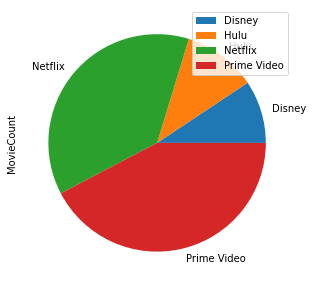

In [40]:
plot = services.groupby(['Service']).sum().plot.pie( y='MovieCount', figsize=(5, 5))

Average rating of a movie on each service according to IMDb and Rotten Tomatoes

In [41]:
netflixFilms = movies[movies["Netflix"] == 1]
netflixAvgIMDb = netflixFilms["IMDb"].mean()
netflixAvgRT = netflixFilms["Rotten Tomatoes"].mean()


huluFilms = movies[movies["Hulu"] == 1]
huluAvgIMDb = huluFilms["IMDb"].mean()
huluAvgRT = huluFilms["Rotten Tomatoes"].mean()

primeFilms = movies[movies["Prime Video"] == 1]
primeAvgIMDb = primeFilms["IMDb"].mean()
primeAvgRT = primeFilms["Rotten Tomatoes"].mean()

disneyFilms = movies[movies["Disney+"] == 1]
disneyAvgIMDb = disneyFilms["IMDb"].mean()
disneyAvgRT = disneyFilms["Rotten Tomatoes"].mean()

avgIMDb=[disneyAvgIMDb, primeAvgIMDb,huluAvgIMDb, netflixAvgIMDb]
avgRT=[disneyAvgRT, primeAvgRT,huluAvgRT, netflixAvgRT]
label=['Disney', 'Prime Video','Hulu','Netflix']



averages = pd.DataFrame(
    {'Service': label,
     'AVGIMDb': avgIMDb,
     'AVGRottenTomatoes': avgRT,
    })
averages



,Service,AVGIMDb,AVGRottenTomatoes
0,Disney,0.654806,0.592585
1,Prime Video,0.597105,0.507024
2,Hulu,0.621098,0.606521
3,Netflix,0.626985,0.551143


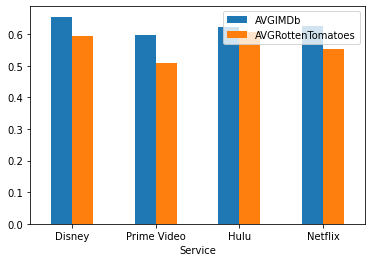

In [42]:
plot = averages.plot.bar(x="Service", rot=0)

Movies with the longest Runtime

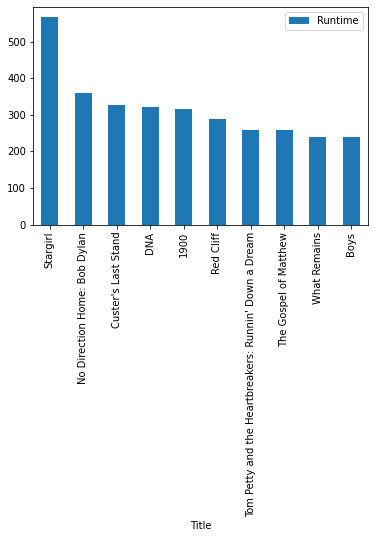

In [43]:
longRuntime = movies.sort_values('Runtime',ascending = False).head(10)
plotRuntime = longRuntime.plot.bar(x="Title", y="Runtime")

## Describe

In [44]:
movies.describe()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Runtime,onServices,GenresNum,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,avgRating
count,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,...,9143.000000,9143.000000,9143.00000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000,9143.000000
mean,2007.166357,0.615734,0.540455,0.384556,0.112545,0.435196,0.096030,95.698239,1.028328,4.106967,...,0.000656,0.005141,0.00350,0.006016,0.000766,0.000656,0.011484,0.000219,0.007109,0.578095
std,19.294151,0.115214,0.129301,0.486517,0.316053,0.495810,0.294648,29.132203,0.172383,3.277900,...,0.025610,0.071517,0.05906,0.077330,0.027661,0.025610,0.106553,0.014789,0.084021,0.104894
min,1914.000000,0.110000,0.100000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000
25%,2006.000000,0.550000,0.440000,0.000000,0.000000,0.000000,0.000000,85.000000,1.000000,2.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.510000
50%,2015.000000,0.630000,0.530000,0.000000,0.000000,0.000000,0.000000,95.000000,1.000000,4.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.575000
75%,2018.000000,0.700000,0.630000,1.000000,0.000000,1.000000,0.000000,109.000000,1.000000,5.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.650000
max,2021.000000,0.980000,0.980000,1.000000,1.000000,1.000000,1.000000,566.000000,4.000000,24.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.925000


## Histograms/Distribution

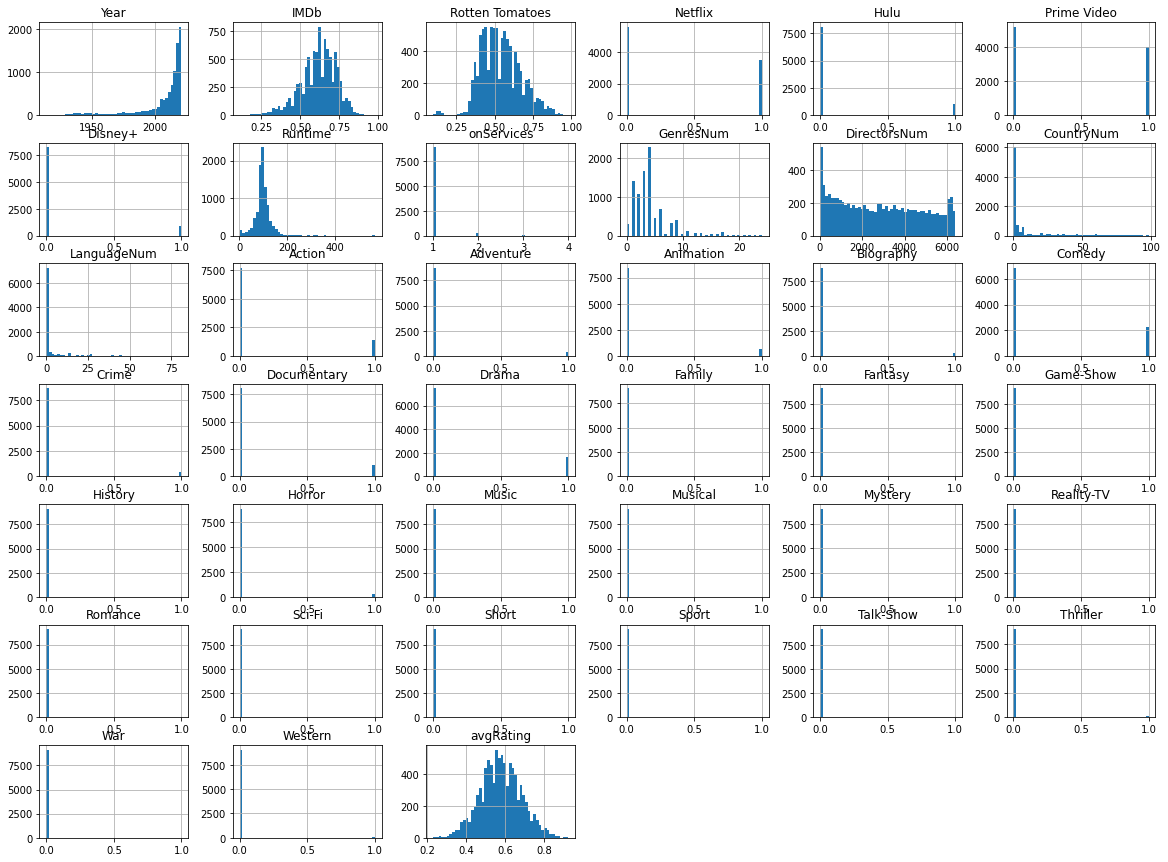

In [45]:
movies.hist(bins=50, figsize=(20,15))
plt.show()

### Year
This has a left/negative skew to it. This make sense as more and more movies are getting released each year. There is a cut off at 2021 as that is the current year.

### IMDb
This has an almost perfect Gaussian distribution. This can be expected as there naturally there will be all different types of movies that will be rated at different points in the specturm. 

### Rotten Tomatoes

This has an Gaussian like distribution. However there is a significant drop off between 0-40. This could be cause rotten tomatoes reviews less movies in general or is less harsh than IMDb

### Runtime

This has a right/positive skew. This makes sense as movies are getting shorter and audiences can only concentrate for so long. 

### On services
Majority of instances are plotted at 1.0. This makes sense as every instance has to be on at least one service. There is some outliers at 2 and 4.

### GenresNum

This has a right/positive skew. This makes sense as there will be a spike as one genre will be more popular than others meaning it will have more instances plotted there.

### DirectorsNum
DirectorsNum has one large spike, this is because NaN values were changed to anon so every instance with no director attribute will have been attributed to anon. The rest of the graph is evenly distributed.

### CountryNum

There is a large right/positive skew. This makes sense as the majority of movies will produced in the same small groups such as united kingdoms, united states and india.

### LanguageNum
There is a large right/positive skew. This makes sense as the majority of movies will be done in the english language as its an international language. 

## Correlation

In [46]:
corr_matrix = movies.corr()
corr_matrix["IMDb"].sort_values(ascending=False)

IMDb               1.000000
avgRating          0.839172
Rotten Tomatoes    0.470481
Documentary        0.250838
Disney+            0.110537
Biography          0.093034
Netflix            0.077195
Animation          0.073731
Runtime            0.073419
LanguageNum        0.066898
Drama              0.034387
onServices         0.028941
Music              0.019201
History            0.017022
Hulu               0.016580
Sport              0.013725
Musical            0.013279
Reality-TV         0.010217
War                0.010177
Short              0.009510
Game-Show          0.001832
Mystery           -0.000182
Crime             -0.002681
Talk-Show         -0.006466
CountryNum        -0.011345
Western           -0.014043
Adventure         -0.018221
Family            -0.020562
Romance           -0.022960
Fantasy           -0.041936
Comedy            -0.058887
Sci-Fi            -0.066126
Year              -0.069752
Thriller          -0.090190
GenresNum         -0.103717
Action            -0

In [47]:
corr_matrixSpear = movies.corr(method='spearman')
corr_matrixSpear["IMDb"].sort_values(ascending=False)


IMDb               1.000000
avgRating          0.825029
Rotten Tomatoes    0.464791
Documentary        0.271124
Runtime            0.118926
Disney+            0.113378
Biography          0.096708
Animation          0.081617
LanguageNum        0.078345
Netflix            0.073283
onServices         0.029723
Drama              0.025674
CountryNum         0.021770
Music              0.018948
History            0.018103
Musical            0.014361
Hulu               0.014129
Sport              0.011445
Reality-TV         0.010944
Short              0.010781
War                0.008696
Game-Show          0.000569
Talk-Show         -0.008986
Mystery           -0.008987
Crime             -0.010358
Western           -0.022070
Adventure         -0.026112
Romance           -0.026888
Family            -0.029711
Fantasy           -0.044192
Sci-Fi            -0.056811
Year              -0.070857
Comedy            -0.073598
Thriller          -0.091706
GenresNum         -0.114425
Action            -0

In [48]:
corr_matrixKen = movies.corr(method='kendall')
corr_matrixKen["IMDb"].sort_values(ascending=False)

IMDb               1.000000
avgRating          0.645943
Rotten Tomatoes    0.328401
Documentary        0.224231
Disney+            0.093769
Runtime            0.084230
Biography          0.079982
Animation          0.067501
LanguageNum        0.060826
Netflix            0.060609
onServices         0.024567
Drama              0.021233
CountryNum         0.015746
Music              0.015671
History            0.014972
Musical            0.011877
Hulu               0.011685
Sport              0.009466
Reality-TV         0.009051
Short              0.008916
War                0.007192
Game-Show          0.000471
Talk-Show         -0.007432
Mystery           -0.007432
Crime             -0.008566
Western           -0.018253
Adventure         -0.021596
Romance           -0.022237
Family            -0.024572
Fantasy           -0.036549
Sci-Fi            -0.046985
Year              -0.048876
Comedy            -0.060869
Thriller          -0.075845
GenresNum         -0.084775
Action            -0

As we can see IMDb and Rotten tomatoes is the most correlated. This was as expected as the ratings for movies will be similar and not dependent on the website. Disney+ was also highly correlated, I some what expected to see this as Disney has a younger audience who may be more likely to have heard of IMDb rather than Rotten Tomatoes. 

In [49]:
corr_matrix["Rotten Tomatoes"].sort_values(ascending=False)

Rotten Tomatoes    1.000000
avgRating          0.874728
IMDb               0.470481
Runtime            0.253502
Hulu               0.181966
Disney+            0.131413
Biography          0.113731
onServices         0.089867
Animation          0.082212
Action             0.071670
Netflix            0.065346
Year               0.052625
Adventure          0.036838
Crime              0.019056
Mystery            0.006838
Fantasy           -0.002825
War               -0.010348
Horror            -0.011504
Drama             -0.014249
Sport             -0.016307
Game-Show         -0.019501
History           -0.027501
Sci-Fi            -0.029573
Musical           -0.033568
Reality-TV        -0.034114
Comedy            -0.035380
Music             -0.036384
Talk-Show         -0.036757
Romance           -0.039170
Documentary       -0.064252
Thriller          -0.064530
Western           -0.066147
Short             -0.068319
Family            -0.072608
LanguageNum       -0.111944
GenresNum         -0

In [50]:
corr_matrixSpear["Rotten Tomatoes"].sort_values(ascending=False)

Rotten Tomatoes    1.000000
avgRating          0.870223
IMDb               0.464791
Runtime            0.295985
Hulu               0.196812
Disney+            0.130262
Biography          0.112469
onServices         0.097914
Animation          0.082693
Action             0.067870
Netflix            0.064283
Adventure          0.037683
Crime              0.018161
Mystery            0.005356
Fantasy           -0.002526
Game-Show         -0.008962
Horror            -0.009070
War               -0.011757
Drama             -0.011897
Sport             -0.017299
History           -0.025289
Year              -0.026105
Music             -0.026589
Reality-TV        -0.030989
Comedy            -0.032020
Talk-Show         -0.032749
Musical           -0.033915
Sci-Fi            -0.034380
Romance           -0.042755
Short             -0.059413
Documentary       -0.065148
Thriller          -0.069830
Family            -0.075211
GenresNum         -0.077109
Western           -0.078933
CountryNum        -0

In [51]:
corr_matrixKen["Rotten Tomatoes"].sort_values(ascending=False)

Rotten Tomatoes    1.000000
avgRating          0.697168
IMDb               0.328401
Runtime            0.205541
Hulu               0.162515
Disney+            0.107562
Biography          0.092870
onServices         0.080813
Animation          0.068283
Action             0.056043
Netflix            0.053081
Adventure          0.031116
Crime              0.014996
Mystery            0.004422
Fantasy           -0.002086
Game-Show         -0.007401
Horror            -0.007489
War               -0.009708
Drama             -0.009824
Sport             -0.014284
Year              -0.018263
History           -0.020882
Music             -0.021956
Reality-TV        -0.025589
Comedy            -0.026440
Talk-Show         -0.027042
Musical           -0.028005
Sci-Fi            -0.028388
Romance           -0.035304
Short             -0.049060
Documentary       -0.053795
GenresNum         -0.055091
Thriller          -0.057661
Family            -0.062105
Western           -0.065178
CountryNum        -0

We can see again that Rotten Tomatoes and IMDb are the most correlated attributes. The next highly correlated attribute is Runtime. This could be because Rotten Tomatoes is tailored more towards critics, who will prefer a more complete movie which may require more time.

array([[<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Disney+', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Hulu', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='avgRating', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='DirectorsNum', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='CountryNum', ylabel='Rotten Tomatoes'>],
       [<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Disney+'>,
        <AxesSubplot:xlabel='Disney+', ylabel='Disney+'>,
        <AxesSubplot:xlabel='Hulu', ylabel='Disney+'>,
        <AxesSubplot:xlabel='Runtime', ylabel='Disney+'>,
        <AxesSubplot:xlabel='IMDb', ylabel='Disney+'>,
        <AxesSubplot:xlabel='avgRating', ylabel='Disney+'>,
        <AxesSubplot:xlabel='DirectorsNum', ylabel='Disney+'>,
        <AxesSubplot:xlabel='CountryNum', yl

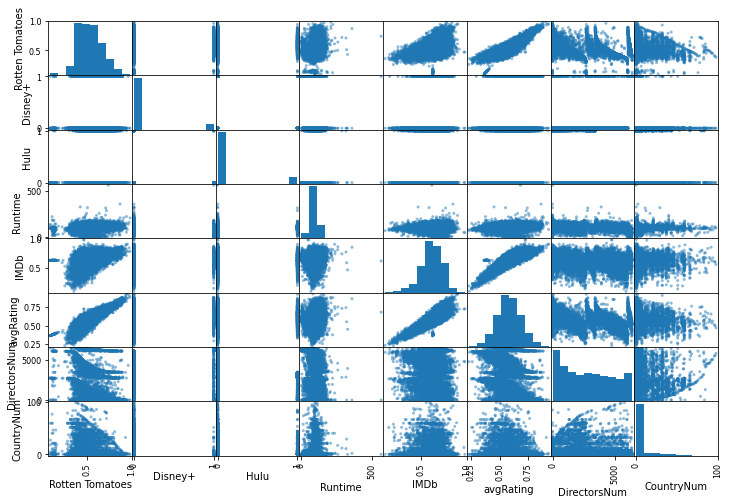

In [52]:
from pandas.plotting import scatter_matrix

attributes = ["Rotten Tomatoes", "Disney+", "Hulu",
              "Runtime", "IMDb", "avgRating", "DirectorsNum", "CountryNum"]
scatter_matrix(movies[attributes], figsize=(12, 8))

array([[<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Documentary', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Horror', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Prime Video', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='avgRating', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='DirectorsNum', ylabel='Rotten Tomatoes'>,
        <AxesSubplot:xlabel='Action', ylabel='Rotten Tomatoes'>],
       [<AxesSubplot:xlabel='Rotten Tomatoes', ylabel='Documentary'>,
        <AxesSubplot:xlabel='Documentary', ylabel='Documentary'>,
        <AxesSubplot:xlabel='Horror', ylabel='Documentary'>,
        <AxesSubplot:xlabel='Prime Video', ylabel='Documentary'>,
        <AxesSubplot:xlabel='IMDb', ylabel='Documentary'>,
        <AxesSubplot:xlabel='avgRating', ylabel='Documentary'>,
        <AxesSubplot:xlabel='DirectorsNum', ylabel='Documentary'>,


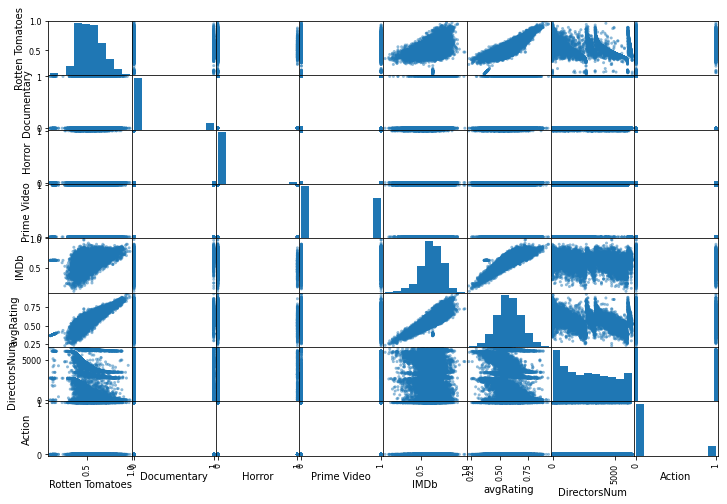

In [53]:
attributes = ["Rotten Tomatoes", "Documentary", "Horror",
              "Prime Video", "IMDb", "avgRating", "DirectorsNum", "Action"]
scatter_matrix(movies[attributes], figsize=(12, 8))

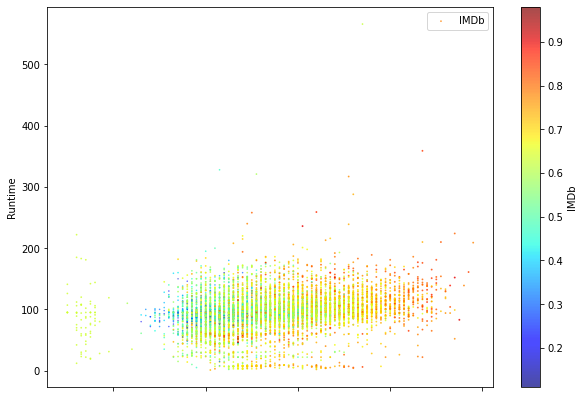

In [54]:
movies.plot(kind="scatter", x="Rotten Tomatoes", y="Runtime", alpha=0.7,
    s=movies["IMDb"], label="IMDb", figsize=(10,7),
    c="IMDb", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

The movies with a shorter duration (<100) have a lower rating on rotten tomatoes than they do on IMDb

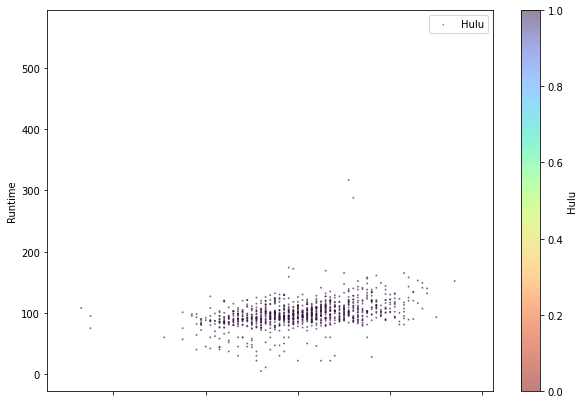

In [55]:
movies.plot(kind="scatter", x="Rotten Tomatoes", y="Runtime", alpha=0.5,
    s=movies["Hulu"], label="Hulu", figsize=(10,7),
    c="Hulu", colormap="turbo_r",
)
plt.legend()

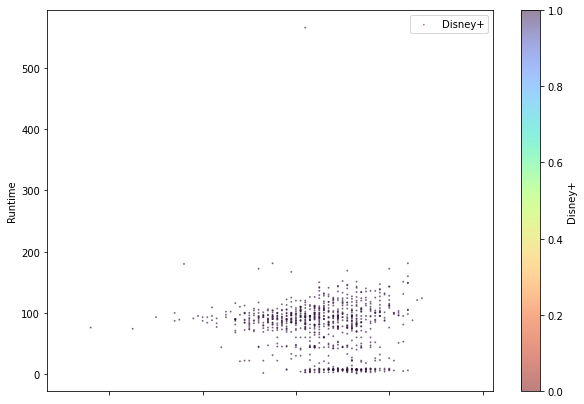

In [56]:
movies.plot(kind="scatter", x="IMDb", y="Runtime", alpha=0.5,
    s=movies["Disney+"], label="Disney+", figsize=(10,7),
    c="Disney+", colormap="turbo_r",
)
plt.legend()

# Subclasses

I have two target classes IMDb and Rotten Tomatoes. I will create subsets for each reducing the number of attributes for each and seeing how tha affects correlation.

## IMDb

### First Sub Class
Rotten tomatoes, Disney+, Netflix, Runtime, LanguageNum, onServices, Hulu. These are all the attributes positively correlated with IMDb




In [57]:
IMDbSubset1 = movies[["Rotten Tomatoes", "avgRating", "Documentary", "DirectorsNum", "Horror", "Prime Video", "Action"]]




### Second Sub Class
Rotten Tomatoes, Disney+, Netflix, Runtime, LanguageNum. This is a subset of the positively correlated attributes.

In [58]:
IMDbSubset2 = movies[["Rotten Tomatoes", "avgRating", "Documentary", "DirectorsNum", "Horror",]]

### Third Sub Class 
Rotten tomatoes, Disney+, Netflix. This is the top three attributes that are positvely correlated. 

In [59]:
IMDbSubset3 = movies[["Rotten Tomatoes", "avgRating", "Documentary",]]

## Rotten Tomatoes

### First Sub Class

IMDb, Runtime, Hulu, Disney+, onServices, Netflix, year. These are all the attributes positively correlated with Rotten Tomatoes.


In [60]:
rtSubset1 = movies[["avgRating", "IMDb","DirectorsNum", "Runtime", "Hulu", "CountryNum", "Disney+"]]



### Second Sub Class
IMDb, Runtime, Hulu, Disney+, onServices. This is a subset of the positively correlated attributes.

In [61]:
rtSubset2 = movies[["avgRating", "IMDb","DirectorsNum", "Runtime", "Hulu"]]

### Third Sub Class
IMDb, Runtime, Hulu. This is the top three attributes that are positvely correlated.

In [62]:
rtSubset3 = movies[["avgRating", "IMDb","DirectorsNum"]]

# Naive Bayes

For Naive Bayes to work my target attribute must catecorgical/nominal as it is a classifer. Currently my class attributes IMDb and Rotten Tomatoes is numerical, so I will have to use equal width binning to create a new attribute. 

In [63]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
bins = [0, 0.25, 0.5, 0.75, 1]
binNames = ["low", "average", "good", "perfect"]

targetRT = pd.cut(movies["Rotten Tomatoes"], bins, labels=binNames);
targetIMDb = pd.cut(movies["IMDb"], bins, labels=binNames);
targetRT = enc.fit_transform(targetRT)
targetIMDb = enc.fit_transform(targetIMDb)




bayesMoviesRT = movies.drop(["Title", "Genres", "Language", "Country","Directors","Age", "Rotten Tomatoes"], axis=1)
bayesMoviesIM = movies.drop(["Title", "Genres", "Language", "Country","Directors","Age", "IMDb"], axis=1)




Naive bayes where the target attribute is Rotten Tomatoes and using the whole dataframe

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
x_trainRT, x_testRT, y_trainRT, y_testRT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.2)
rtModel = MultinomialNB()
rtModel.fit(x_trainRT, y_trainRT)
rtModel.score(x_testRT, y_testRT)

0.11208310552214325

This didn't return a great score, this is due to the type of naive bayes I selected which is MultinomialNB. I am gonna switch to gaussinaNB as it makes the assumption that my target attribute has a gaussian distribution which you can see that it does from my previous histograms.

In [65]:

from sklearn.naive_bayes import GaussianNB
x_trainRT, x_testRT, y_trainRT, y_testRT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.2)
rtModel = GaussianNB()
rtModel.fit(x_trainRT, y_trainRT)
rtModel.score(x_testRT, y_testRT)

0.6232914160743576

This is naive bayes where the target is IMDb.

In [66]:
x_trainIM, x_testIM, y_trainIM, y_testIM = train_test_split(bayesMoviesIM, targetIMDb, test_size = 0.2)
imModel = GaussianNB()
imModel.fit(x_trainIM, y_trainIM)
imModel.score(x_testIM, y_testIM)

0.5806451612903226

## Naive Bayes on Subsets

### IMDb

I will try naive bayes on the first subset for the IMDb target attribute and see if it returns a better accuracy

In [67]:
x_trainIMSub1, x_testIMSub1, y_trainIMSub1, y_testIMSub1 = train_test_split(IMDbSubset1, targetIMDb, test_size = 0.2)
IMSub1Model = GaussianNB()
IMSub1Model.fit(x_trainIMSub1, y_trainIMSub1)
IMSub1Model.score(x_testIMSub1, y_testIMSub1)

0.758337889557135

I got a signficant increase in accuracy, I will now try naive bayes on the second subset for the target attribute IMDb

In [68]:
x_trainIMSub2, x_testIMSub2, y_trainIMSub2, y_testIMSub2 = train_test_split(IMDbSubset2, targetIMDb, test_size = 0.2)
IMSub2Model = GaussianNB()
IMSub2Model.fit(x_trainIMSub2, y_trainIMSub2)
IMSub2Model.score(x_testIMSub2, y_testIMSub2)

0.7960634226353198

I got a increase in accuracy again but not as large.I will now try naive bayes on the second subset for the target attribute IMDb

In [69]:
x_trainIMSub3, x_testIMSub3, y_trainIMSub3, y_testIMSub3 = train_test_split(IMDbSubset3, targetIMDb, test_size = 0.2)
IMSub3Model = GaussianNB()
IMSub3Model.fit(x_trainIMSub3, y_trainIMSub3)
IMSub3Model.score(x_testIMSub3, y_testIMSub3)

0.7643521049753964

### Rotten Tomatoes

I will try naive bayes on the first subset for the rotten tomatoes attribute and see if it returns a better accuracy compared to using the whole dataframe

In [70]:
x_trainRTSub1, x_testRTSub1, y_trainRTSub1, y_testRTSub1 = train_test_split(rtSubset1, targetRT, test_size = 0.2)
rtSub1Model = GaussianNB()
rtSub1Model.fit(x_trainRTSub1, y_trainRTSub1)
rtSub1Model.score(x_testRTSub1, y_testRTSub1)

0.7534171678512849

As you can see we have returned a significant better result with the subset rather than using the whole dataframe. I will now run using the second subset for the rotten tomatoes attribute.

In [71]:
x_trainRTSub2, x_testRTSub2, y_trainRTSub2, y_testRTSub2 = train_test_split(rtSubset2, targetRT, test_size = 0.2)
rtSub2Model = GaussianNB()
rtSub2Model.fit(x_trainRTSub2, y_trainRTSub2)
rtSub2Model.score(x_testRTSub2, y_testRTSub2)

0.7698195735374521

I am suprised as the accuracy has gone down when compared to the first subset but it is still significantly more accurate than using the whole dataframe. I will now run naive Bayes on the thrid subset for rotten tomatoes attribute.

In [72]:
x_trainRTSub3, x_testRTSub3, y_trainRTSub3, y_testRTSub3 = train_test_split(rtSubset3, targetRT, test_size = 0.2)
rtSub3Model = GaussianNB()
rtSub3Model.fit(x_trainRTSub3, y_trainRTSub3)
rtSub3Model.score(x_testRTSub3, y_testRTSub3)

0.764898851831602

# Analysis of Naive Bayes

I will now analyse the navie bayes classifier for each of my dataframes. The first dataframe I will at is the one that contains all my attributes and has a class atrribute of Rotten Tomatoes. 

### Class Attribute = Rotten Tomatoes and used whole Dataframe

In [73]:

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

predictedRT=rtModel.predict(x_testRT)
acRT=accuracy_score(predictedRT,y_testRT)

confMatrixRT = confusion_matrix(y_testRT, predictedRT)

TNRT = confMatrixRT[0][0]
FNRT = confMatrixRT[1][0]
TPRT = confMatrixRT[1][1]
FPRT = confMatrixRT[0][1]


successRateRT = (TPRT+TNRT) /(TPRT+TNRT+FPRT+FNRT)
errorRateRT = 1 - successRateRT
sensitivityRT = TPRT/(TPRT+FNRT)
specificityRT = TNRT/(TNRT+FPRT)
precisionRT = TPRT/(TPRT+FPRT)
recallRT = TPRT/(TPRT+FNRT)

F_measureRT = (2*recallRT*precisionRT) / (recallRT+precisionRT)
rocAUCRT = roc_auc_score(y_testRT, rtModel.predict_proba(x_testRT), multi_class='ovr')

print("The analysis of gaussian navie bayes for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateRT))
print("errorRate: " + str(errorRateRT))
print("Sensitivity: " + str(sensitivityRT))
print("Specificity: " + str(specificityRT))
print("Precision: "+ str(precisionRT))
print("Recall: "+ str(recallRT))
print("F_measure: "+ str(F_measureRT))
print("Accuracy: " + str(acRT))
print("Area under the curve "+ str(rocAUCRT))


The analysis of gaussian navie bayes for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 0.6989830508474576
errorRate: 0.3010169491525424
Sensitivity: 0.9193989071038251
Specificity: 0.48183041722745623
Precision: 0.6361058601134215
Recall: 0.9193989071038251
F_measure: 0.7519553072625699
Accuracy: 0.6232914160743576
Area under the curve 0.8318462575793548


### Class Attribute = IMDb and used whole Dataframe

In [74]:
from sklearn import metrics

predictedIM=imModel.predict(x_testIM)

acIM=accuracy_score(predictedIM,y_testIM)

confMatrixIM = confusion_matrix(y_testIM, predictedIM)

TNIM = confMatrixIM[0][0]
FNIM = confMatrixIM[1][0]
TPIM = confMatrixIM[1][1]
FPIM = confMatrixIM[0][1]


successRateIM = (TPIM+TNIM) /(TPIM+TNIM+FPIM+FNIM)
errorRateIM = 1-successRateIM
sensitivityIM = TPIM/(TPIM+FNIM)
specificityIM = TNIM/(TNIM+FPIM)
precisionIM = TPIM/(TPIM+FPIM)
recallIM = TPIM/(TPIM+FNIM)

F_measureIM = (2*recallIM*precisionIM) / (recallIM+precisionIM)
rocAUCIM = roc_auc_score(y_testIM, imModel.predict_proba(x_testIM), multi_class='ovr')

print("The analysis of gaussian navie bayes for IMDb class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateIM))
print("errorRate: " + str(errorRateIM))
print("Sensitivity: " + str(sensitivityIM))
print("Specificity: " + str(specificityIM))
print("Precision: "+ str(precisionIM))
print("Recall: "+ str(recallIM))
print("F_measure: "+ str(F_measureIM))
print("Accuracy: " + str(acIM))
print("Area under the curve "+ str(rocAUCIM))

The analysis of gaussian navie bayes for IMDb class attribute using the whole dataframe
SuccessRate: 0.7666948436179205
errorRate: 0.2333051563820795
Sensitivity: 0.7752918287937743
Specificity: 0.7096774193548387
Precision: 0.9465558194774347
Recall: 0.7752918287937743
F_measure: 0.8524064171122996
Accuracy: 0.5806451612903226
Area under the curve 0.82457034302718


### Class Attribute = IMDb and used whole IMDb subset 1

In [75]:
from sklearn import metrics

predictedIMSub1=IMSub1Model.predict(x_testIMSub1)


acIMSub1=accuracy_score(predictedIMSub1,y_testIMSub1)

confMatrixIMSub1 = confusion_matrix(y_testIMSub1, predictedIM)

TNIMSub1 = confMatrixIMSub1[0][0]
FNIMSub1 = confMatrixIMSub1[1][0]
TPIMSub1 = confMatrixIMSub1[1][1]
FPIMSub1 = confMatrixIMSub1[0][1]


successRateIMSub1 = (TPIMSub1+TNIMSub1) /(TPIMSub1+TNIMSub1+FPIMSub1+FNIMSub1)
errorRateIMSub1 = 1-successRateIMSub1
sensitivityIMSub1 = TPIMSub1/(TPIMSub1+FNIMSub1)
specificityIMSub1 = TNIMSub1/(TNIMSub1+FPIMSub1)
precisionIMSub1 = TPIMSub1/(TPIMSub1+FPIMSub1)
recallIMSub1 = TPIMSub1/(TPIMSub1+FNIMSub1)

F_measureIMSub1 = (2*recallIMSub1*precisionIMSub1) / (recallIMSub1+precisionIMSub1)
rocAUCIMSub1 = roc_auc_score(y_testIMSub1, IMSub1Model.predict_proba(x_testIMSub1), multi_class='ovr')

print("The analysis of gaussian navie bayes for IMDb class attribute using the subset1 dataframe")
print("SuccessRate: " + str(successRateIMSub1))
print("errorRate: " + str(errorRateIMSub1))
print("Sensitivity: " + str(sensitivityIMSub1))
print("Specificity: " + str(specificityIMSub1))
print("Precision: "+ str(precisionIMSub1))
print("Recall: "+ str(recallIMSub1))
print("F_measure: "+ str(F_measureIMSub1))
print("Accuracy: " + str(acIMSub1))
print("Area under the curve "+ str(rocAUCIMSub1))

The analysis of gaussian navie bayes for IMDb class attribute using the subset1 dataframe
SuccessRate: 0.632258064516129
errorRate: 0.367741935483871
Sensitivity: 0.7114093959731543
Specificity: 0.2617801047120419
Precision: 0.8185328185328186
Recall: 0.7114093959731543
F_measure: 0.7612208258527828
Accuracy: 0.758337889557135
Area under the curve 0.8716466903638511


### Class Attribute = IMDb and used IMDb subset2

In [76]:
from sklearn import metrics

predictedIMSub2=IMSub2Model.predict(x_testIMSub2)


acIMSub2=accuracy_score(predictedIMSub2,y_testIMSub2)

confMatrixIMSub2 = confusion_matrix(y_testIMSub2, predictedIM)

TNIMSub2 = confMatrixIMSub2[0][0]
FNIMSub2 = confMatrixIMSub2[1][0]
TPIMSub2 = confMatrixIMSub2[1][1]
FPIMSub2 = confMatrixIMSub2[0][1]


successRateIMSub2 = (TPIMSub2+TNIMSub2) /(TPIMSub2+TNIMSub2+FPIMSub2+FNIMSub2)
errorRateIMSub2 = 1-successRateIMSub2
sensitivityIMSub2 = TPIMSub2/(TPIMSub2+FNIMSub2)
specificityIMSub2 = TNIMSub2/(TNIMSub2+FPIMSub2)
precisionIMSub2 = TPIMSub2/(TPIMSub2+FPIMSub2)
recallIMSub2 = TPIMSub2/(TPIMSub2+FNIMSub2)

F_measureIMSub2 = (2*recallIMSub2*precisionIMSub2) / (recallIMSub2+precisionIMSub2)
rocAUCIMSub2 = roc_auc_score(y_testIMSub2, IMSub2Model.predict_proba(x_testIMSub2), multi_class='ovr')

print("The analysis of gaussian navie bayes for IMDb class attribute using the subset 2 dataframe")
print("SuccessRate: " + str(successRateIMSub2))
print("errorRate: " + str(errorRateIMSub2))
print("Sensitivity: " + str(sensitivityIMSub2))
print("Specificity: " + str(specificityIMSub2))
print("Precision: "+ str(precisionIMSub2))
print("Recall: "+ str(recallIMSub2))
print("F_measure: "+ str(F_measureIMSub2))
print("Accuracy: " + str(acIMSub2))
print("Area under the curve "+ str(rocAUCIMSub2))

The analysis of gaussian navie bayes for IMDb class attribute using the subset 2 dataframe
SuccessRate: 0.645928636779506
errorRate: 0.35407136322049404
Sensitivity: 0.7221609702315325
Specificity: 0.27419354838709675
Precision: 0.8291139240506329
Recall: 0.7221609702315325
F_measure: 0.7719505008839126
Accuracy: 0.7960634226353198
Area under the curve 0.8989585739069764


### Class Attribute = IMDb and used IMDb subset3

In [77]:
from sklearn import metrics

predictedIMSub3=IMSub3Model.predict(x_testIMSub3)


acIMSub3=accuracy_score(predictedIMSub3,y_testIMSub3)

confMatrixIMSub3 = confusion_matrix(y_testIMSub3, predictedIM)

TNIMSub3 = confMatrixIMSub3[0][0]
FNIMSub3 = confMatrixIMSub3[1][0]
TPIMSub3 = confMatrixIMSub3[1][1]
FPIMSub3 = confMatrixIMSub3[0][1]

successRateIMSub3 = (TPIMSub3+TNIMSub3) /(TPIMSub3+TNIMSub3+FPIMSub3+FNIMSub3)
errorRateIMSub3 = 1-successRateIMSub3
sensitivityIMSub3 = TPIMSub3/(TPIMSub3+FNIMSub3)
specificityIMSub3 = TNIMSub3/(TNIMSub3+FPIMSub3)
precisionIMSub3 = TPIMSub3/(TPIMSub3+FPIMSub3)
recallIMSub3 = TPIMSub3/(TPIMSub3+FNIMSub3)

F_measureIMSub3 = (2*recallIMSub3*precisionIMSub3) / (recallIMSub3+precisionIMSub3)
rocAUCIMSub3 = roc_auc_score(y_testIMSub3, IMSub3Model.predict_proba(x_testIMSub3), multi_class='ovr')

print("The analysis of gaussian navie bayes for IMDb class attribute using the subset 3 dataframe")
print("SuccessRate: " + str(successRateIMSub3))
print("errorRate: " + str(errorRateIMSub3))
print("Sensitivity: " + str(sensitivityIMSub3))
print("Specificity: " + str(specificityIMSub3))
print("Precision: "+ str(precisionIMSub3))
print("Recall: "+ str(recallIMSub3))
print("F_measure: "+ str(F_measureIMSub3))
print("Accuracy: " + str(acIMSub3))
print("Area under the curve "+ str(rocAUCIMSub3))

The analysis of gaussian navie bayes for IMDb class attribute using the subset 3 dataframe
SuccessRate: 0.6335807050092764
errorRate: 0.36641929499072357
Sensitivity: 0.7067833698030634
Specificity: 0.22560975609756098
Precision: 0.8357050452781372
Recall: 0.7067833698030634
F_measure: 0.7658565500889153
Accuracy: 0.7643521049753964
Area under the curve 0.9110062305611317


The model that performed the best for the class attribute IMDb was subset 3. This is the subset with the least amount of attributes that were highly correlated with the class attribute. 

### Class Attribute = Rotten Tomatoes and used Rotten Tomatoes subset 1

In [78]:
from sklearn import metrics

predictedRTSub1=rtSub1Model.predict(x_testRTSub1)

acRTSub1=accuracy_score(predictedRTSub1,y_testRTSub1)

confMatrixRTSub1 = confusion_matrix(y_testRTSub1, predictedRTSub1)

TNRTSub1 = confMatrixRTSub1[0][0]
FNRTSub1 = confMatrixRTSub1[1][0]
TPRTSub1 = confMatrixRTSub1[1][1]
FPRTSub1 = confMatrixRTSub1[0][1]


successRateRTSub1 = (TPRTSub1+TNRTSub1) /(TPRTSub1+TNRTSub1+FPRTSub1+FNRTSub1)
errorRateRTSub1 = 1-successRateRTSub1
sensitivityRTSub1 = TPRTSub1/(TPRTSub1+FNRTSub1)
specificityRTSub1 = TNRTSub1/(TNRTSub1+FPRTSub1)
precisionRTSub1 = TPRTSub1/(TPRTSub1+FPRTSub1)
recallRTSub1 = TPRTSub1/(TPRTSub1+FNRTSub1)

F_measureRTSub1 = (2*recallRTSub1*precisionRTSub1) / (recallRTSub1+precisionRTSub1)
rocAUCRTSub1 = roc_auc_score(y_testRTSub1, rtSub1Model.predict_proba(x_testRTSub1), multi_class='ovr')

print("The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 1 dataframe")
print("SuccessRate: " + str(successRateRTSub1))
print("errorRate: " + str(errorRateRTSub1))
print("Sensitivity: " + str(sensitivityRTSub1))
print("Specificity: " + str(specificityRTSub1))
print("Precision: "+ str(precisionRTSub1))
print("Recall: "+ str(recallRTSub1))
print("F_measure: "+ str(F_measureRTSub1))
print("Accuracy: " + str(acRTSub1))
print("Area under the curve "+ str(rocAUCRTSub1))

The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 1 dataframe
SuccessRate: 0.7833433916716959
errorRate: 0.21665660832830413
Sensitivity: 0.8117782909930716
Specificity: 0.7522123893805309
Precision: 0.7819799777530589
Recall: 0.8117782909930716
F_measure: 0.796600566572238
Accuracy: 0.7534171678512849
Area under the curve 0.8888142067303066


### Class Attribute = Rotten Tomatoes and used Rotten Tomatoes subset 2

In [79]:
from sklearn import metrics

predictedRTSub2=rtSub2Model.predict(x_testRTSub2)

acRTSub2=accuracy_score(predictedRTSub2,y_testRTSub2)

confMatrixRTSub2 = confusion_matrix(y_testRTSub2, predictedRTSub2)

TNRTSub2 = confMatrixRTSub2[0][0]
FNRTSub2 = confMatrixRTSub2[1][0]
TPRTSub2 = confMatrixRTSub2[1][1]
FPRTSub2 = confMatrixRTSub2[0][1]


successRateRTSub2 = (TPRTSub2+TNRTSub2) /(TPRTSub2+TNRTSub2+FPRTSub2+FNRTSub2)
errorRateRTSub2 = 1-successRateRTSub2
sensitivityRTSub2 = TPRTSub2/(TPRTSub2+FNRTSub2)
specificityRTSub2 = TNRTSub2/(TNRTSub2+FPRTSub2)
precisionRTSub2 = TPRTSub2/(TPRTSub2+FPRTSub2)
recallRTSub2 = TPRTSub2/(TPRTSub2+FNRTSub2)

F_measureRTSub2 = (2*recallRTSub2*precisionRTSub2) / (recallRTSub2+precisionRTSub2)
rocAUCRTSub2 = roc_auc_score(y_testRTSub2, rtSub2Model.predict_proba(x_testRTSub2), multi_class='ovr')

print("The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 2 dataframe")
print("SuccessRate: " + str(successRateRTSub2))
print("errorRate: " + str(errorRateRTSub2))
print("Sensitivity: " + str(sensitivityRTSub2))
print("Specificity: " + str(specificityRTSub2))
print("Precision: "+ str(precisionRTSub2))
print("Recall: "+ str(recallRTSub2))
print("F_measure: "+ str(F_measureRTSub2))
print("Accuracy: " + str(acRTSub2))
print("Area under the curve "+ str(rocAUCRTSub2))

The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 2 dataframe
SuccessRate: 0.7921615201900237
errorRate: 0.20783847980997627
Sensitivity: 0.7913907284768212
Specificity: 0.7930591259640103
Precision: 0.816628701594533
Recall: 0.7913907284768212
F_measure: 0.8038116591928252
Accuracy: 0.7698195735374521
Area under the curve 0.9120309377512308


### Class Attribute = Rotten Tomatoes and used Rotten Tomatoes subset 3

In [80]:
from sklearn import metrics

predictedRTSub3=rtSub3Model.predict(x_testRTSub3)


acRTSub3=accuracy_score(predictedRTSub3,y_testRTSub3)

confMatrixRTSub3 = confusion_matrix(y_testRTSub3, predictedRTSub3)

TNRTSub3 = confMatrixRTSub3[0][0]
FNRTSub3 = confMatrixRTSub3[1][0]
TPRTSub3 = confMatrixRTSub3[1][1]
FPRTSub3 = confMatrixRTSub3[0][1]


successRateRTSub3 = (TPRTSub3+TNRTSub3) /(TPRTSub3+TNRTSub3+FPRTSub3+FNRTSub3)
errorRateRTSub3 = 1-successRateRTSub3
sensitivityRTSub3 = TPRTSub3/(TPRTSub3+FNRTSub3)
specificityRTSub3 = TNRTSub3/(TNRTSub3+FPRTSub3)
precisionRTSub3 = TPRTSub3/(TPRTSub3+FPRTSub3)
recallRTSub3 = TPRTSub3/(TPRTSub3+FNRTSub3)

F_measureRTSub3 = (2*recallRTSub3*precisionRTSub3) / (recallRTSub3+precisionRTSub3)

rocAUCRTSub3 = roc_auc_score(y_testRTSub3, rtSub3Model.predict_proba(x_testRTSub3), multi_class='ovr')

print("The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 3 dataframe")
print("SuccessRate: " + str(successRateRTSub3))
print("errorRate: " + str(errorRateRTSub3))
print("Sensitivity: " + str(sensitivityRTSub3))
print("Specificity: " + str(specificityRTSub3))
print("Precision: "+ str(precisionRTSub3))
print("Recall: "+ str(recallRTSub3))
print("F_measure: "+ str(F_measureRTSub3))
print("Accuracy: " + str(acRTSub3))
print("Area under the curve "+ str(rocAUCRTSub3))

The analysis of gaussian navie bayes for Rotten Tomaotes class attribute using the subset 3 dataframe
SuccessRate: 0.7872467222884386
errorRate: 0.21275327771156138
Sensitivity: 0.8492688413948256
Specificity: 0.7173637515842839
Precision: 0.7719836400817995
Recall: 0.8492688413948256
F_measure: 0.80878414568827
Accuracy: 0.764898851831602
Area under the curve 0.9249941335949291


Out of all the classifer for Rotten Tomatoes the one that performed the best was the model using the Subset 3. This subset is the middle subset only got the top three correlated attributes for Rotten Tomatoes.

### Plotting the best classifers with ROC curve

I choose the best models for each class attribute. I decided it was the best if it had the largest ROC AUC number. Cause I have a multiclass problem, I plotted each class vs the rest. 

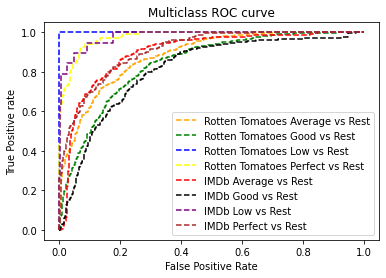

In [81]:
# roc curve for classes
from sklearn.metrics import roc_curve
fpr = {}
tpr = {}
thresh ={}

fpr1 = {}
tpr1 = {}
thresh1 = {}

n_class = 4


 

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testRTSub3, rtSub3Model.predict_proba(x_testRTSub3)[:, i], pos_label=i)
    
for i in range(n_class):    
    fpr1[i], tpr1[i], thresh1[i] = roc_curve(y_testIMSub2, IMSub2Model.predict_proba(x_testIMSub2)[:, i], pos_label=i)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Rotten Tomatoes Average vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Rotten Tomatoes Good vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Rotten Tomatoes Low vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Rotten Tomatoes Perfect vs Rest')

plt.plot(fpr1[0], tpr1[0], linestyle='--',color='red', label='IMDb Average vs Rest')
plt.plot(fpr1[1], tpr1[1], linestyle='--',color='black', label='IMDb Good vs Rest')
plt.plot(fpr1[2], tpr1[2], linestyle='--',color='purple', label='IMDb Low vs Rest')
plt.plot(fpr1[3], tpr1[3], linestyle='--',color='brown', label='IMDb Perfect vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=500); 

# Clustering

For each of my target attributes IMDb and Rotten Tomatoes I will the two most correlated attributes to use for K-means. As K-means is usually perfomed with 2-dimensional numerical data.

### Plotting two attributes for IMDb

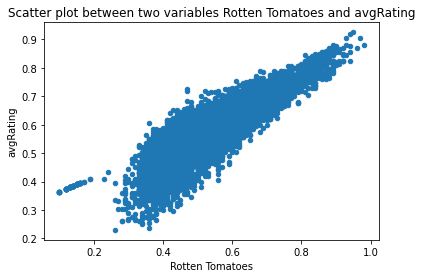

In [82]:
IMKmeans = bayesMoviesIM[["Rotten Tomatoes", "avgRating"]]
RTKmeans = bayesMoviesRT[["avgRating", "IMDb"]]

IMKmeans.plot.scatter(x='Rotten Tomatoes', y='avgRating', title= "Scatter plot between two variables Rotten Tomatoes and avgRating");


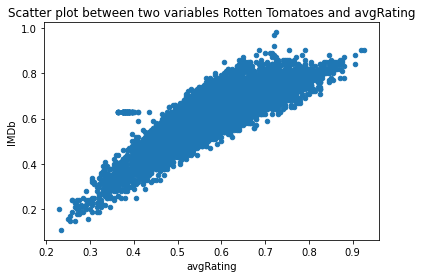

In [83]:
RTKmeans.plot.scatter(x='avgRating', y='IMDb', title= "Scatter plot between two variables Rotten Tomatoes and avgRating");


It is obvious from the two scatter plots that there is no natural clusters that emerge. It will start with a K of 4 to reflect the bins that were made for my target attributes targetRT and targetIMDb.

## Rotten Tomatoes target attribute clustering

### K means clustering

In [84]:
from sklearn.cluster import KMeans

RTKmeans = RTKmeans.to_numpy()
k = 4

kMeansRT = KMeans(n_clusters=k, init="random", algorithm="full", n_init=100)

y_predRT = kMeansRT.fit_predict(RTKmeans)


In [85]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

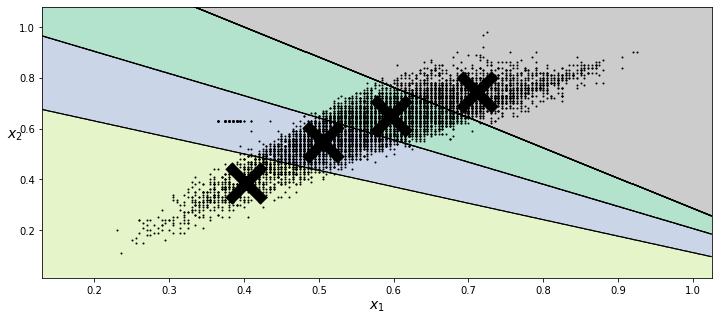

In [86]:
plt.figure(figsize=(12, 5))
plot_decision_boundaries(kMeansRT, RTKmeans)
plt.show()

We can see above the clusters defined by the K means algorithm using 4 clusters for a class attribute of targetRT using the two most correlated attributes avgRating and IMDb. We can see from the graph the use of 4 clusters is good as there is clear seperation between our centroids. We can also see the centroids are positioned perfectly along the line of best fit for the graph, this may signal that my data would be more suitable using regression.

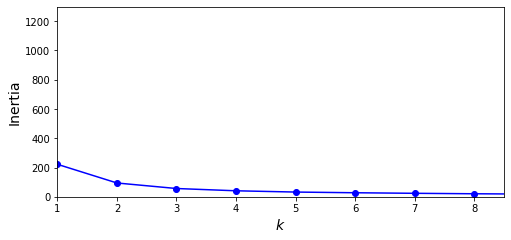

In [87]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(RTKmeans)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 8.5, 0, 1300])
plt.show()

Using a for loop to generate k from a range of 1 to 10, we can create a graph to graph the number of clusters k and inertia of the k means model. As we can see 5 is the optimum value as there is not much change after that value.

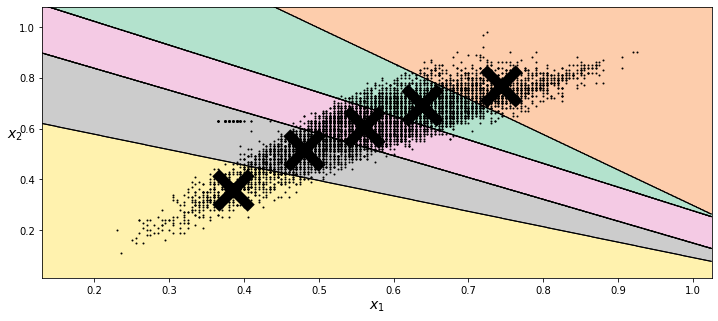

In [88]:
kMeansRT = KMeans(n_clusters=5, init="random", algorithm="full", n_init=100)

y_predRT = kMeansRT.fit_predict(RTKmeans)

plt.figure(figsize=(12, 5))
plot_decision_boundaries(kMeansRT, RTKmeans)
plt.show()

### Mini Batch K-Means clustering

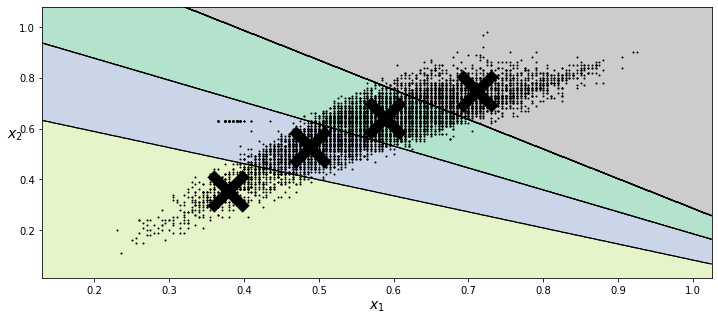

In [89]:
from sklearn.cluster import MiniBatchKMeans


miniRT = MiniBatchKMeans(n_clusters=4)

miniRT.fit(RTKmeans)


plt.figure(figsize=(12, 5))
plot_decision_boundaries(miniRT, RTKmeans)
plt.show()



This is not much different to the clustering carried out by K means, there is only a slight difference between the last 2 clusters (green and grey), with the grey cluster being slightly larger than the last cluster of k means. 

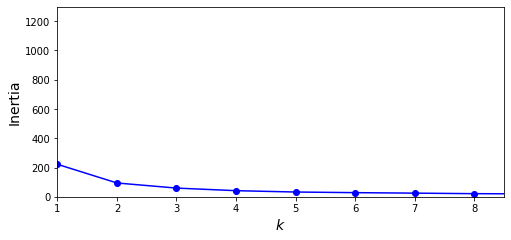

In [90]:
miniKmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(RTKmeans)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in miniKmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)

plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 8.5, 0, 1300])
plt.show()

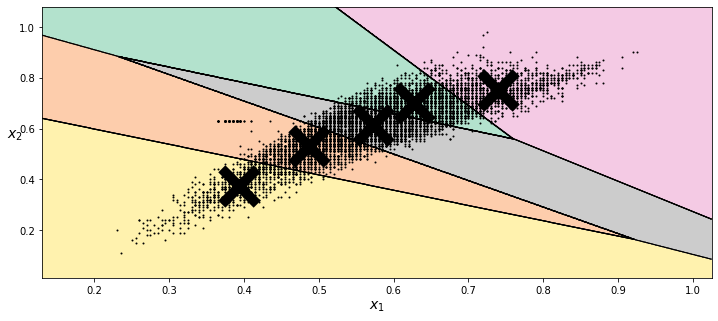

In [91]:
miniRT = MiniBatchKMeans(n_clusters=5)

miniRT.fit(RTKmeans)


plt.figure(figsize=(12, 5))
plot_decision_boundaries(miniRT, RTKmeans)
plt.show()

### DBSCAN clustering

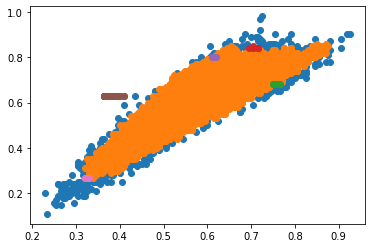

In [92]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN


dbscanRT = DBSCAN(eps=0.01001, min_samples=7)

yhat = dbscanRT.fit_predict(RTKmeans)

clusters = unique(yhat)

for c in clusters:
    row_ix = where(yhat == c)
    plt.scatter(x=RTKmeans[row_ix, 0], y=RTKmeans[row_ix, 1], cmap='rainbow')

plt.show()

This was not a good clustering alogrithm for my dataset as the examples are too dense ,i.e. plotted to close together For DBSCAN to work the eps has to be set to a very low number. 

### Gaussian Mixture Models Clustering

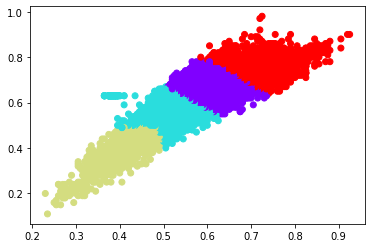

In [93]:
from sklearn.mixture import GaussianMixture

gmRT = GaussianMixture(n_components=4)

ypred = gmRT.fit(RTKmeans)

labels = gmRT.predict(RTKmeans)
plt.scatter(x=RTKmeans[:, 0], y=RTKmeans[:, 1], c=labels, cmap='rainbow');

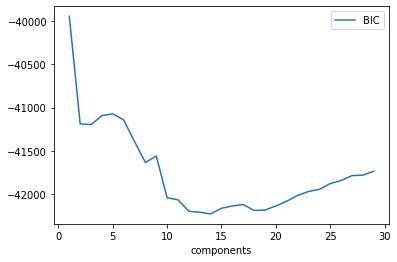

In [94]:
components = np.arange(1, 30)
models = [GaussianMixture(i, covariance_type='full', random_state=0).fit(RTKmeans) for i in components]
plt.plot(components, [m.bic(RTKmeans) for m in models], label='BIC')
plt.xlabel('components');
plt.legend(loc='best')

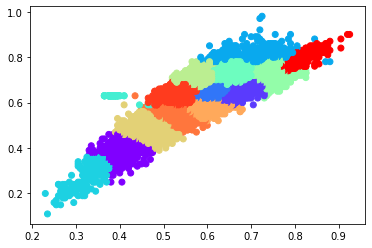

In [95]:
gmRT = GaussianMixture(n_components=14)

ypred = gmRT.fit(RTKmeans)

clusters = gmRT.predict(RTKmeans)
plt.scatter(x=RTKmeans[:, 0], y=RTKmeans[:, 1], c=clusters, cmap='rainbow');

## IMDb target attribute clustering
### K means clustering

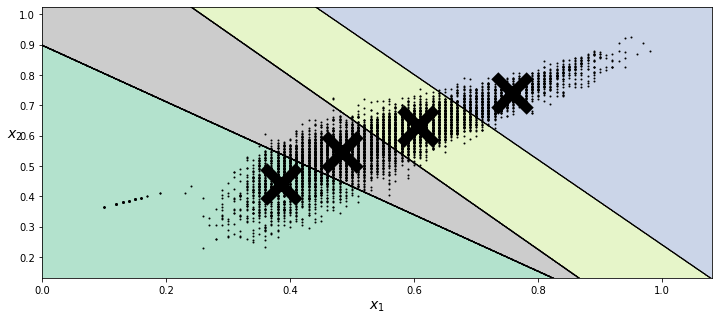

In [96]:
IMKmeans = IMKmeans.to_numpy()
k = 4

kMeansIM = KMeans(n_clusters=k, init="random", algorithm="full", n_init=100)

y_predIM = kMeansIM.fit_predict(IMKmeans)

plt.figure(figsize=(12, 5))
plot_decision_boundaries(kMeansIM, IMKmeans)
plt.show()

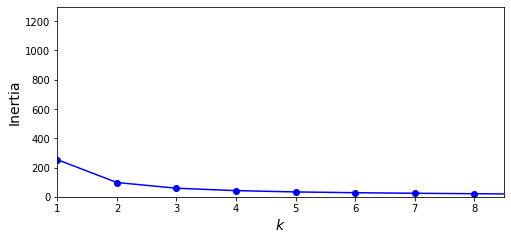

In [97]:
IMkmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(IMKmeans)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in IMkmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 8.5, 0, 1300])
plt.show()

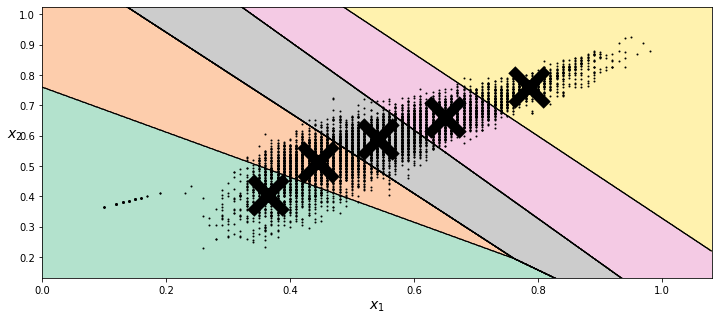

In [98]:
kMeansIM = KMeans(n_clusters=5, init="random", algorithm="full", n_init=100)

y_predIM = kMeansIM.fit_predict(IMKmeans)

plt.figure(figsize=(12, 5))
plot_decision_boundaries(kMeansIM, IMKmeans)
plt.show()

### Mini Batch K-Means clustering

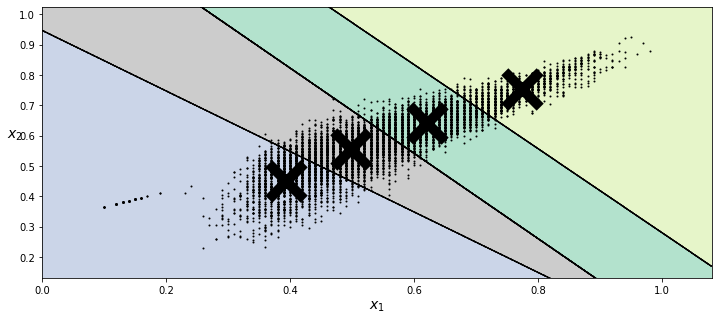

In [99]:
miniIM = MiniBatchKMeans(n_clusters=4)

miniIM.fit(IMKmeans)


plt.figure(figsize=(12, 5))
plot_decision_boundaries(miniIM, IMKmeans)
plt.show()

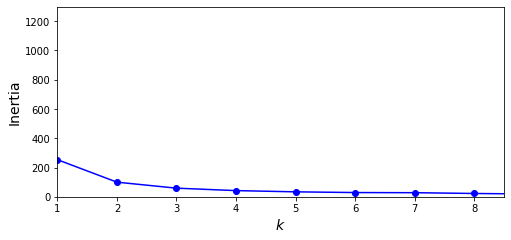

In [100]:
IMminiKmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(IMKmeans)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in IMminiKmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)

plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 8.5, 0, 1300])
plt.show()

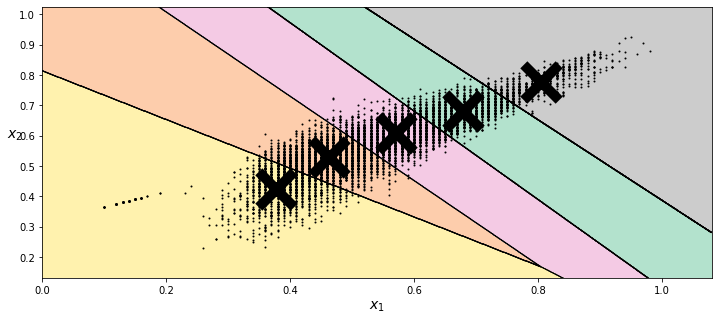

In [101]:
miniIM = MiniBatchKMeans(n_clusters=5)

miniIM.fit(IMKmeans)


plt.figure(figsize=(12, 5))
plot_decision_boundaries(miniIM, IMKmeans)
plt.show()

### DBSCAN clustering

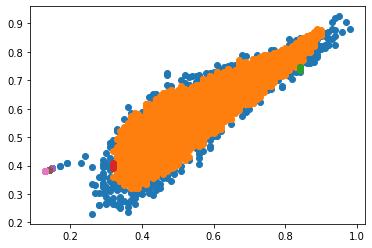

In [102]:
dbscanIM = DBSCAN(eps=0.01001, min_samples=7)

yhatIM = dbscanIM.fit_predict(IMKmeans)

clusters = unique(yhat)

for c in clusters:

    row_ix = where(yhatIM == c)

     
    plt.scatter(x=IMKmeans[row_ix, 0], y=IMKmeans[row_ix, 1], cmap='rainbow')

plt.show()

### Gaussian Mixture Models Clustering

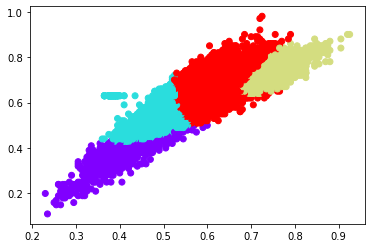

In [103]:
gmIM = GaussianMixture(n_components=4)

ypredIM = gmIM.fit(IMKmeans)

labelsIM = gmIM.predict(RTKmeans)
plt.scatter(x=RTKmeans[:, 0], y=RTKmeans[:, 1], c=labelsIM, cmap='rainbow');

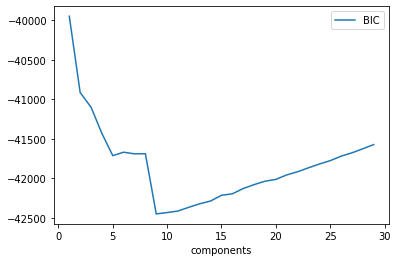

In [104]:
components = np.arange(1, 30)
models = [GaussianMixture(i, covariance_type='full', random_state=0).fit(IMKmeans) for i in components]
plt.plot(components, [m.bic(IMKmeans) for m in models], label='BIC')
plt.xlabel('components');
plt.legend(loc='best')

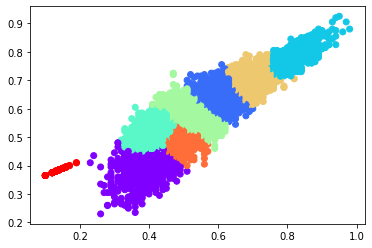

In [105]:
gmIM = GaussianMixture(n_components=8)

ypredIM = gmIM.fit(IMKmeans)

labelsIM = gmIM.predict(IMKmeans)



plt.scatter(IMKmeans[:, 0], IMKmeans[:, 1], c=labelsIM, cmap='rainbow');

## Whole dataframe Rotten Tomatoes

### K Means clustering


In [106]:
bayesMoviesRTCluster = bayesMoviesRT.to_numpy()

k = 4

kMeansRTAll = KMeans(n_clusters=k, init="random", algorithm="full", n_init=100)

y_predRT = kMeansRTAll.fit_predict(bayesMoviesRTCluster)

kMeansRTAll.inertia_




2031210125.4334605

A sample size of 4 was picked to reflect the bins of the class attribute. If we return the inertia of the clustering algorithm we can see it is quite high. I will now run the rand_score metric to get a result of how well the clustering algorithm clusters in comparison to the class attribute. This is possible because like my class attribute which has 4 bins, k is set to 4.

In [107]:
from sklearn.metrics.cluster import rand_score
rand_score(targetRT,kMeansRTAll.labels_)

0.5849676736243569

I will now run the elbow method to identify a better k value for my data when using K means.

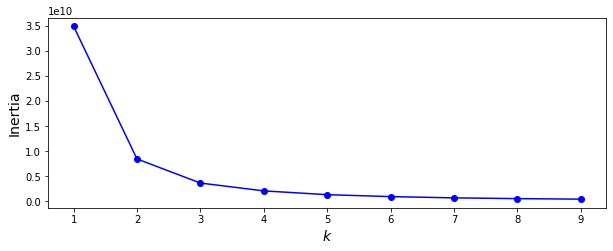

In [108]:
RTALLkmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(bayesMoviesRTCluster)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in RTALLkmeans_per_k]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [109]:
kMeansRTAll = KMeans(n_clusters=6, init="random", algorithm="full", n_init=100)

y_predRT = kMeansRTAll.fit_predict(bayesMoviesRTCluster)

kMeansRTAll.inertia_

890225479.9237128

The elbow method graph we can see it completely flattens out at a value of 6. Running k means with a k of 6 has also returned
a lower inertia, implying it is a better number of cluster.

### Gaussian Mixture Models Clustering

In [110]:
gmRTAll = GaussianMixture(n_components=4)

ypred = gmRTAll.fit(bayesMoviesRTCluster)
labelsRTAll = gmRTAll.predict(bayesMoviesRTCluster)



In [111]:

rand_score(targetRT,labelsRTAll)

0.5218078163164229

Again a cluster size of 4 was picked to reflect the bin size of the class attribute. Inertia cant be used for this model so I just ran the rand_score metric to get a score for this clustering method. This clustering method returned a worse result for my dataset. This might be becuase GMM is a soft clustering algorithm and there may have been many points that had high probability for multiple centroids. I will now use the BIC (bayesian information criteron) measure to evaluate the best amount of clusters for my dataset.

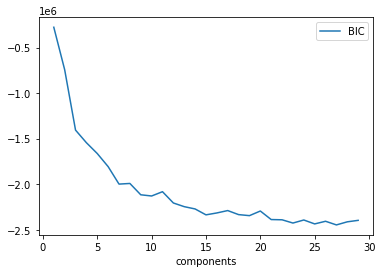

In [112]:
components = np.arange(1, 30)
models = [GaussianMixture(i, covariance_type='full', random_state=0).fit(bayesMoviesRTCluster) for i in components]
plt.plot(components, [m.bic(bayesMoviesRTCluster) for m in models], label='BIC')
plt.xlabel('components');
plt.legend(loc='best')

In [113]:
gmRTAll = GaussianMixture(n_components=23)

ypred = gmRTAll.fit(bayesMoviesRTCluster)
labelsRTAll = gmRTAll.predict(bayesMoviesRTCluster)


The amount of clusters that seems to have the most optimal bic number is 23. This would be more compuatationally expensive when compared to other clustering algorithms.

### Mini Batch K-Means clustering

In [114]:
miniRTAll = MiniBatchKMeans(n_clusters=4)

labelsRTAllMini = miniRTAll.fit_predict(bayesMoviesRTCluster)

miniRTAll.inertia_

2032805039.9658105

In [115]:
rand_score(targetRT,labelsRTAllMini)

0.5869329951367289

Again a cluster amount of 4 was choosen to reflect the bin. A rand score could also be calculated as the cluster number and bins are the same. This ran score returned a similar result to K means this can be expected as they use the same algorithm just mini batch splits the data set up so that it can be parallised. I will now run the elbow technique to see if there is an optimal k value.

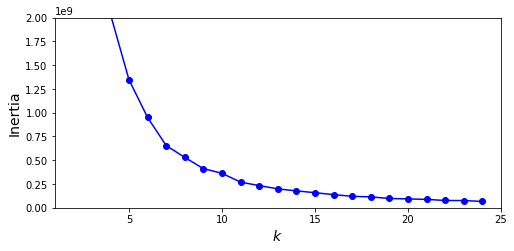

In [116]:
RTminiKmeans_per_k = [MiniBatchKMeans(n_clusters=k).fit(bayesMoviesRTCluster)
                for k in range(1, 25)]
inertias = [model.inertia_ for model in RTminiKmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 25), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)

plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 25, 0, 2000000000])
plt.show()

In [117]:
miniRTAll = MiniBatchKMeans(n_clusters=21)

labelsRTAllMini = miniRTAll.fit_predict(bayesMoviesRTCluster)

miniRTAll.inertia_

84592037.52705213

The graph completely flattens out at 21. This is a signifcantly higher k compared to the elbow of k means. Using the k means 

### DBSCAN

In [118]:
dbscanRTAll = DBSCAN(eps=0.01001, min_samples=4)

labelsRTAllDB = dbscanRTAll.fit_predict(bayesMoviesRTCluster)

rand_score(targetRT,labelsRTAllDB)

0.4380367046810835

This clustering algorithm returned a lower score for ran score. This may be due to the nature of the algorithm, which cluster depending on density. Clusters of are seperated by areas of low density. This means there must be a relatively uniform density in the dataset. 

### Mean Shift

In [119]:
from sklearn.cluster import MeanShift

meanShiftRTAll = MeanShift(bandwidth=4).fit_predict(bayesMoviesRTCluster)

rand_score(targetRT, meanShiftRTAll)

0.5619776997645973

This algorithm has performed better than the DBSCAN as meanshift makes the assumption that the data has a smoot/uniform density. However this algorithm has still performed worse than K means and mini batch K means this may be because both these algorithms use variance to calculate the centroids.

## Whole Dataframe IMDb

### K Means clustering

In [120]:
bayesMoviesIMCluster = bayesMoviesIM.to_numpy()

k = 4

kMeansIMAll = KMeans(n_clusters=k, init="random", algorithm="full", n_init=100)

yPredIM = kMeansIMAll.fit_predict(bayesMoviesIMCluster)

kMeansIMAll.inertia_

2031211624.5434487

In [121]:


rand_score(targetIMDb,kMeansIMAll.labels_)

0.4575157743634988

A k number of 4 was choosen again. Intertia was calculated and it was quite large. I then ran rand score metric which returned a lower result when compared to K means of the previous class attribute. I will now run the elbow technique to identify the optimal K.

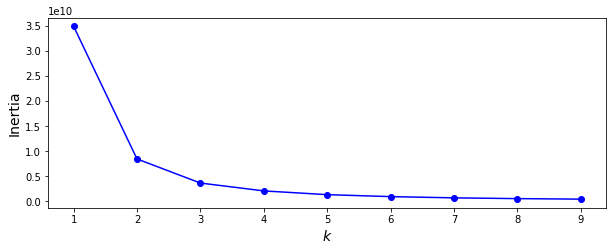

In [122]:
IMALLkmeans_per_k = [KMeans(n_clusters=k).fit(bayesMoviesIMCluster)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in IMALLkmeans_per_k]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [123]:
kMeansIMAll = KMeans(n_clusters=5, init="random", algorithm="full", n_init=100)

y_predIM = kMeansIMAll.fit_predict(bayesMoviesIMCluster)

kMeansIMAll.inertia_

1279769133.4937692

The elbow technique identified 5 as the optimal k value. Using this optimal value lowers the intertia signficantly. 

### Gaussian Mixture Models Clustering

In [124]:
gmIMAll = GaussianMixture(n_components=4)

ypred = gmIMAll.fit(bayesMoviesIMCluster)


labelsIMAll = gmIMAll.predict(bayesMoviesIMCluster)


In [125]:

rand_score(targetIMDb,labelsIMAll)

0.4725176216977659

Using the value of 4 again and running rand score on GMM returned a slightly better result when compared with K means this may be because GMM uses probabilities and in this case they are no points that have a high probability for multiple centroids. I will now use BIC to evalute the optimal number of clusters

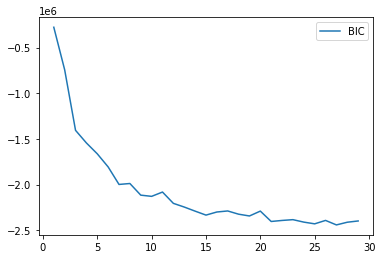

In [126]:
components = np.arange(1, 30)
GMmodels = [GaussianMixture(i, covariance_type='full', random_state=0).fit(bayesMoviesIMCluster) for i in components]
plt.plot(components, [m.bic(bayesMoviesIMCluster) for m in GMmodels], label='BIC')

plt.legend(loc='best')

In [127]:
gmIMAll = GaussianMixture(n_components=23)

ypred = gmIMAll.fit(bayesMoviesIMCluster)



labelsIMAll = gmIMAll.predict(bayesMoviesIMCluster)


From the graph we are able to see that the optimal value is 23.

### Mini Batch K-Means clustering

In [128]:
miniIMAll = MiniBatchKMeans(n_clusters=4)

labelsIMAllMini = miniIMAll.fit_predict(bayesMoviesIMCluster)

miniIMAll.inertia_

2138963327.362754

In [129]:
rand_score(targetIMDb,labelsIMAllMini)

0.46137374911327117

A number of 4 was picked again, Inertia was returned which was quite large. Rand score was run and it returned a very similar result to K means. This is because they are both the same algorithm. The elbow techinqiue was then used to identify the optimal value.

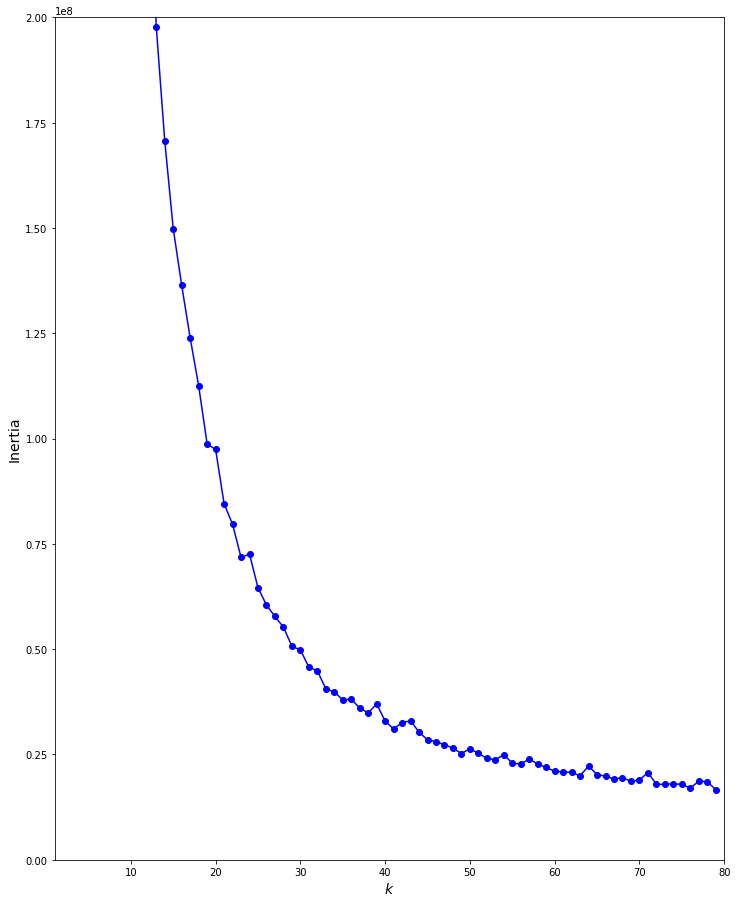

In [130]:
IMminiKmeans_per_k = [MiniBatchKMeans(n_clusters=k).fit(bayesMoviesIMCluster)
                for k in range(1, 80)]
inertias = [model.inertia_ for model in IMminiKmeans_per_k]

plt.figure(figsize=(12, 15.5))
plt.plot(range(1, 80), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)

plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 80, 0, 200000000])
plt.show()

In [131]:
miniIMAll = MiniBatchKMeans(n_clusters=59)

labelsIMAllMini = miniIMAll.fit_predict(bayesMoviesIMCluster)

miniIMAll.inertia_

21534143.601774085

The optimal value was significantly larger than K means, 59. Uses this optimal value reduces the inertia.

### DBSCAN

In [132]:
dbscanIMAll = DBSCAN(eps=0.01001, min_samples=4)

labelsIMAllDB = dbscanIMAll.fit_predict(bayesMoviesIMCluster)

rand_score(targetIMDb,labelsIMAllDB)

0.5972856999530516

I value of 4 was used again and rand score metric was run. This returned a better result than all the previous clustering algorithms. This must mean that the dataset had differianting densities. This means the data has areas of high density seperated with areas of lower density. 

### Mean Shift

In [133]:
meanShiftIMAll = MeanShift(bandwidth=4).fit_predict(bayesMoviesIMCluster)

rand_score(targetIMDb, meanShiftIMAll)

0.4027319107978142

Mean shift perfomed the worst out of all the clustering algorithms as it is really good with smooth data. This would make sense as we know that DBSCAN performed the best which makes the opposite assumption to mean shift.

# Descision Tree

## Rotten Tomatoes

In [134]:

from sklearn import tree 
from sklearn.model_selection import cross_val_score
x_trainRTDT, x_testRTDT, y_trainRTDT, y_testRTDT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.2)

DTRT = tree.DecisionTreeClassifier(random_state=42)
scores = cross_val_score(DTRT, x_trainRTDT, y_trainRTDT, cv=10)
scores.mean()


0.9789441815613017

In [135]:
DTRT = DTRT.fit(x_trainRTDT, y_trainRTDT)
predictedRTDT= DTRT.predict(x_trainRTDT)
acRTDT= accuracy_score(predictedRTDT,y_trainRTDT)

confMatrixRTDT = confusion_matrix(y_trainRTDT, predictedRTDT)

TNRTDT = confMatrixRTDT[0][0]
FNRTDT = confMatrixRTDT[1][0]
TPRTDT = confMatrixRTDT[1][1]
FPRTDT = confMatrixRTDT[0][1]


successRateRTDT = (TPRTDT+TNRTDT) /(TPRTDT+TNRTDT+FPRTDT+FNRTDT)
errorRateRTDT = 1 - successRateRTDT
sensitivityRTDT = TPRTDT/(TPRTDT+FNRTDT)
specificityRTDT = TNRTDT/(TNRTDT+FPRTDT)
precisionRTDT = TPRTDT/(TPRTDT+FPRTDT)
recallRTDT = TPRTDT/(TPRTDT+FNRTDT)

F_measureRTDT = (2*recallRTDT*precisionRTDT) / (recallRTDT+precisionRTDT)
rocAUCRTDT = roc_auc_score(y_testRTDT, DTRT.predict_proba(x_testRTDT), multi_class='ovr')

print("The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateRTDT))
print("errorRate: " + str(errorRateRTDT))
print("Sensitivity: " + str(sensitivityRTDT))
print("Specificity: " + str(specificityRTDT))
print("Precision: "+ str(precisionRTDT))
print("Recall: "+ str(recallRTDT))
print("F_measure: "+ str(F_measureRTDT))
print("Accuracy: " + str(acRTDT))
print("Area under the curve "+ str(rocAUCRTDT))

The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 1.0
errorRate: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F_measure: 1.0
Accuracy: 1.0
Area under the curve 0.9851443033107166


In [136]:
DTRT = tree.DecisionTreeClassifier(random_state=42)
DTRT = DTRT.fit(x_trainRTDT, y_trainRTDT)
DTRT.score(x_testRTDT, y_testRTDT)

0.9803171131765992

In [137]:
predictedRTDT= DTRT.predict(x_testRTDT)
acRTDT= accuracy_score(predictedRTDT,y_testRTDT)

confMatrixRTDT = confusion_matrix(y_testRTDT, predictedRTDT)

TNRTDT = confMatrixRTDT[0][0]
FNRTDT = confMatrixRTDT[1][0]
TPRTDT = confMatrixRTDT[1][1]
FPRTDT = confMatrixRTDT[0][1]


successRateRTDT = (TPRTDT+TNRTDT) /(TPRTDT+TNRTDT+FPRTDT+FNRTDT)
errorRateRTDT = 1 - successRateRTDT
sensitivityRTDT = TPRTDT/(TPRTDT+FNRTDT)
specificityRTDT = TNRTDT/(TNRTDT+FPRTDT)
precisionRTDT = TPRTDT/(TPRTDT+FPRTDT)
recallRTDT = TPRTDT/(TPRTDT+FNRTDT)

F_measureRTDT = (2*recallRTDT*precisionRTDT) / (recallRTDT+precisionRTDT)
rocAUCRTDT = roc_auc_score(y_testRTDT, DTRT.predict_proba(x_testRTDT), multi_class='ovr')

print("The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateRTDT))
print("errorRate: " + str(errorRateRTDT))
print("Sensitivity: " + str(sensitivityRTDT))
print("Specificity: " + str(specificityRTDT))
print("Precision: "+ str(precisionRTDT))
print("Recall: "+ str(recallRTDT))
print("F_measure: "+ str(F_measureRTDT))
print("Accuracy: " + str(acRTDT))
print("Area under the curve "+ str(rocAUCRTDT))

The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 0.9853458382180539
errorRate: 0.014654161781946118
Sensitivity: 0.9840595111583422
Specificity: 0.9869281045751634
Precision: 0.9893162393162394
Recall: 0.9840595111583422
F_measure: 0.986680873734683
Accuracy: 0.9803171131765992
Area under the curve 0.9851443033107166


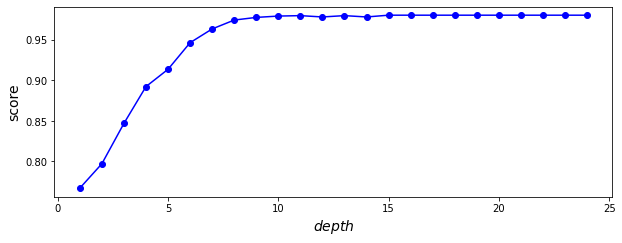

In [138]:


RTDT_per_Depth = [tree.DecisionTreeClassifier(max_depth=k,random_state=42).fit(x_trainRTDT, y_trainRTDT)
                for k in range(1, 25)]
scores = [model.score(x_testRTDT, y_testRTDT) for model in RTDT_per_Depth]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$depth$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

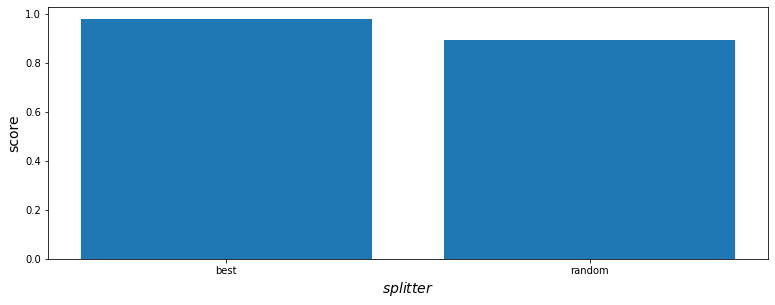

In [139]:
RTDT_per_splitter = [0,0]
RTDT_per_splitter[0] = tree.DecisionTreeClassifier(max_depth=13, random_state=42).fit(x_trainRTDT, y_trainRTDT)
RTDT_per_splitter[1] = tree.DecisionTreeClassifier(max_depth=13, splitter="random", random_state=42).fit(x_trainRTDT, y_trainRTDT)           
scores = [model.score(x_testRTDT, y_testRTDT) for model in RTDT_per_splitter]


ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["best", "random"],scores)
plt.xlabel("$splitter$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

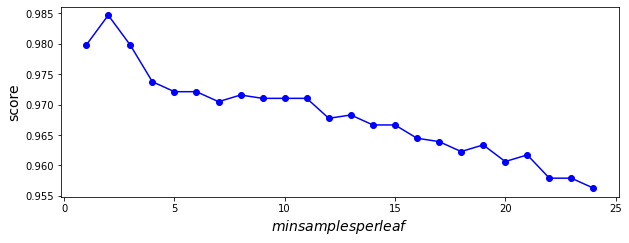

In [140]:
RTDT_per_MinSamples = [tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=k, random_state=42).fit(x_trainRTDT, y_trainRTDT)
                for k in range(1, 25)]
scores = [model.score(x_testRTDT, y_testRTDT) for model in RTDT_per_MinSamples]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$min samples per leaf$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

In [141]:
x_trainRTDT, x_testRTDT, y_trainRTDT, y_testRTDT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)

DTRT = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
DTRT = DTRT.fit(x_trainRTDT, y_trainRTDT)
print("Score with training set: " + str(DTRT.score(x_trainRTDT, y_trainRTDT)) + "\nScore with test set: " + str(DTRT.score(x_testRTDT, y_testRTDT)))



Score with training set: 0.985625
Score with test set: 0.969012030623405


In [142]:
x_trainRTDT, x_testRTDT, y_trainRTDT, y_testRTDT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.6)

DTRT = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
DTRT = DTRT.fit(x_trainRTDT, y_trainRTDT)
print("Score with training set: " + str(DTRT.score(x_trainRTDT, y_trainRTDT)) + "\nScore with test set: " + str(DTRT.score(x_testRTDT, y_testRTDT)))


Score with training set: 0.9956248290948865
Score with test set: 0.953700328107911


## IMDb

In [143]:
x_trainIMDT, x_testIMDT, y_trainIMDT, y_testIMDT = train_test_split(bayesMoviesIM, targetIMDb, test_size = 0.2)

DTIM = tree.DecisionTreeClassifier(random_state=42)
scores = cross_val_score(DTIM, x_trainIMDT, y_trainIMDT, cv=10)
scores.mean()

0.9747050974411877

In [144]:
DTIM = DTIM.fit(x_trainIMDT, y_trainIMDT)
predictedIMDT= DTIM.predict(x_trainIMDT)
acIMDT= accuracy_score(predictedIMDT,y_trainIMDT)

confMatrixIMDT = confusion_matrix(y_trainIMDT, predictedIMDT)

TNIMDT = confMatrixIMDT[0][0]
FNIMDT = confMatrixIMDT[1][0]
TPIMDT = confMatrixIMDT[1][1]
FPIMDT = confMatrixIMDT[0][1]


successRateIMDT = (TPIMDT+TNIMDT) /(TPIMDT+TNIMDT+FPIMDT+FNIMDT)
errorRateIMDT = 1 - successRateIMDT
sensitivityIMDT = TPIMDT/(TPIMDT+FNIMDT)
specificityIMDT = TNIMDT/(TNIMDT+FPIMDT)
precisionIMDT = TPIMDT/(TPIMDT+FPIMDT)
recallIMDT = TPIMDT/(TPRTDT+FNIMDT)

F_measureIMDT = (2*recallIMDT*precisionIMDT) / (recallIMDT+precisionIMDT)
rocAUCIMDT = roc_auc_score(y_testIMDT, DTIM.predict_proba(x_testIMDT), multi_class='ovr')

print("The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateIMDT))
print("errorRate: " + str(errorRateIMDT))
print("Sensitivity: " + str(sensitivityIMDT))
print("Specificity: " + str(specificityIMDT))
print("Precision: "+ str(precisionIMDT))
print("Recall: "+ str(recallIMDT))
print("F_measure: "+ str(F_measureIMDT))
print("Accuracy: " + str(acIMDT))
print("Area under the curve "+ str(rocAUCIMDT))

The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 1.0
errorRate: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
Recall: 5.936285097192225
F_measure: 1.7116612174996109
Accuracy: 1.0
Area under the curve 0.9269512431801243


In [145]:
DTIM = tree.DecisionTreeClassifier(random_state=42)
DTIM = DTIM.fit(x_trainIMDT, y_trainIMDT)
DTIM.score(x_testIMDT, y_testIMDT)

0.9753963914707491

In [146]:
predictedIMDT= DTIM.predict(x_testIMDT)
acIMDT= accuracy_score(predictedIMDT,y_testIMDT)

confMatrixIMDT = confusion_matrix(y_testIMDT, predictedIMDT)

TNIMDT = confMatrixIMDT[0][0]
FNIMDT = confMatrixIMDT[1][0]
TPIMDT = confMatrixIMDT[1][1]
FPIMDT = confMatrixIMDT[0][1]


successRateIMDT = (TPIMDT+TNIMDT) /(TPIMDT+TNIMDT+FPIMDT+FNIMDT)
errorRateIMDT = 1 - successRateIMDT
sensitivityIMDT = TPIMDT/(TPIMDT+FNIMDT)
specificityIMDT = TNIMDT/(TNIMDT+FPIMDT)
precisionIMDT = TPIMDT/(TPIMDT+FPIMDT)
recallIMDT = TPIMDT/(TPRTDT+FNIMDT)

F_measureIMDT = (2*recallIMDT*precisionIMDT) / (recallIMDT+precisionIMDT)
rocAUCIMDT = roc_auc_score(y_testIMDT, DTIM.predict_proba(x_testIMDT), multi_class='ovr')

print("The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateIMDT))
print("errorRate: " + str(errorRateIMDT))
print("Sensitivity: " + str(sensitivityIMDT))
print("Specificity: " + str(specificityIMDT))
print("Precision: "+ str(precisionIMDT))
print("Recall: "+ str(recallIMDT))
print("F_measure: "+ str(F_measureIMDT))
print("Accuracy: " + str(acIMDT))
print("Area under the curve "+ str(rocAUCIMDT))

The analysis of J48 decision tree for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 0.9903264812575574
errorRate: 0.0096735187424426
Sensitivity: 0.9942112879884226
Specificity: 0.9705882352941176
Precision: 0.9942112879884226
Recall: 1.4710920770877944
F_measure: 1.1865284974093264
Accuracy: 0.9753963914707491
Area under the curve 0.9269512431801243


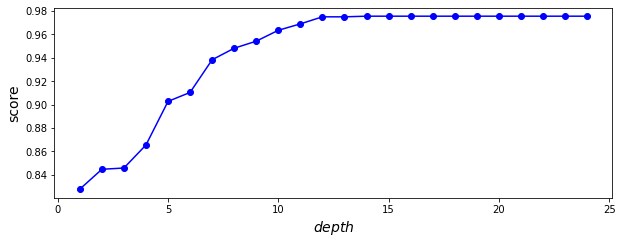

In [147]:
IMDT_per_Depth = [tree.DecisionTreeClassifier(max_depth=k, random_state=42).fit(x_trainIMDT, y_trainIMDT)
                for k in range(1, 25)]
scores = [model.score(x_testIMDT, y_testIMDT) for model in IMDT_per_Depth]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$depth$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

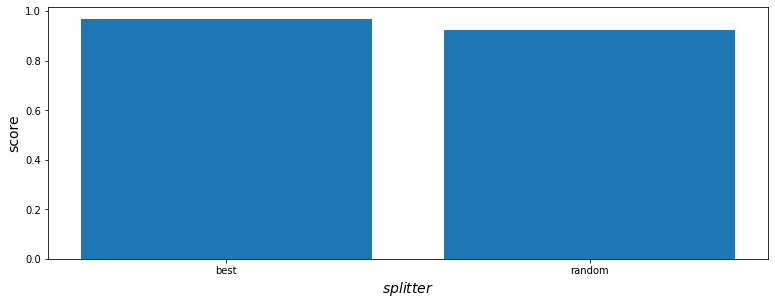

In [148]:
IMDT_per_splitter = [0,0]
IMDT_per_splitter[0] = tree.DecisionTreeClassifier(max_depth=11, random_state=42).fit(x_trainIMDT, y_trainIMDT)
IMDT_per_splitter[1] = tree.DecisionTreeClassifier(max_depth=11, splitter="random", random_state=42).fit(x_trainIMDT, y_trainIMDT)           
scores = [model.score(x_testIMDT, y_testIMDT) for model in IMDT_per_splitter]


ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["best", "random"],scores)
plt.xlabel("$splitter$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

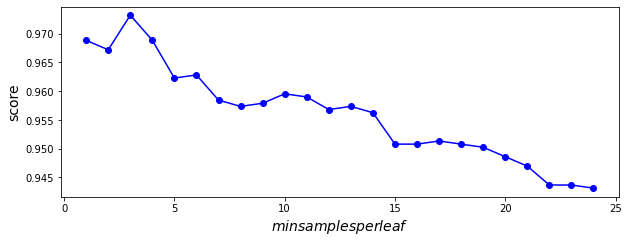

In [149]:
IMDT_per_MinSamples = [tree.DecisionTreeClassifier(max_depth=11, min_samples_leaf=k, random_state=42).fit(x_trainIMDT, y_trainIMDT)
                for k in range(1, 25)]
scores = [model.score(x_testIMDT, y_testIMDT) for model in IMDT_per_MinSamples]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$min samples per leaf$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

In [150]:
x_trainIMDT, x_testIMDT, y_trainIMDT, y_testIMDT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)

DTIM = tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, random_state=42)
DTIM = DTRT.fit(x_trainIMDT, y_trainIMDT)
print("Score with training set: " + str(DTIM.score(x_trainIMDT, y_trainIMDT)) + "\nScore with test set: " + str(DTIM.score(x_testIMDT, y_testIMDT)))



Score with training set: 0.9959375
Score with test set: 0.9708348523514401


In [151]:
x_trainIMDT, x_testIMDT, y_trainIMDT, y_testIMDT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.6)

DTIM = tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, random_state=42)
DTIM = DTRT.fit(x_trainIMDT, y_trainIMDT)
print("Score with training set: " + str(DTIM.score(x_trainIMDT, y_trainIMDT)) + "\nScore with test set: " + str(DTIM.score(x_testIMDT, y_testIMDT)))


Score with training set: 0.9948044845501778
Score with test set: 0.9681006197593875


# Random Forest

## Rotten Tomatoes

In [152]:
from sklearn.ensemble import RandomForestClassifier

x_trainRFRT, x_testRFRT, y_trainRFRT, y_testRFRT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.2)

RFRT= RandomForestClassifier(random_state=42)
scores = cross_val_score(RFRT, x_trainRFRT, y_trainRFRT, cv=10)
scores.mean()



0.9606239674672766

In [153]:
RFRT = RFRT.fit(x_trainRFRT, y_trainRFRT)
predictedRFRT= RFRT.predict(x_testRFRT)
acRFRT= accuracy_score(predictedRFRT,y_testRFRT)

confMatrixRFRT = confusion_matrix(y_testRFRT, predictedRFRT)

TNRFRT = confMatrixRFRT[0][0]
FNRFRT = confMatrixRFRT[1][0]
TPRFRT = confMatrixRFRT[1][1]
FPRFRT = confMatrixRFRT[0][1]


successRateRFRT = (TPRFRT+TNRFRT) /(TPRFRT+TNRFRT+FPRFRT+FNRFRT)
errorRateRFRT = 1 - successRateRFRT
sensitivityRFRT = TPRFRT/(TPRFRT+FNRFRT)
specificityRFRT = TNRFRT/(TNRFRT+FPRFRT)
precisionRFRT = TPRFRT/(TPRFRT+FPRFRT)
recallRFRT = TPRFRT/(TPRFRT+FNRFRT)

F_measureRFRT = (2*recallRFRT*precisionRFRT) / (recallRFRT+precisionRFRT)
rocAUCRFRT = roc_auc_score(y_testRFRT, RFRT.predict_proba(x_testRFRT), multi_class='ovr')

print("The analysis of random forest decision tree for Rotten Tomatoes class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateRFRT))
print("errorRate: " + str(errorRateRFRT))
print("Sensitivity: " + str(sensitivityRFRT))
print("Specificity: " + str(specificityRFRT))
print("Precision: "+ str(precisionRFRT))
print("Recall: "+ str(recallRFRT))
print("F_measure: "+ str(F_measureRFRT))
print("Accuracy: " + str(acRFRT))
print("Area under the curve "+ str(rocAUCRFRT))

The analysis of random forest decision tree for Rotten Tomatoes class attribute using the whole dataframe
SuccessRate: 0.9729411764705882
errorRate: 0.027058823529411802
Sensitivity: 0.9760869565217392
Specificity: 0.9692307692307692
Precision: 0.9739696312364425
Recall: 0.9760869565217392
F_measure: 0.9750271444082519
Accuracy: 0.9633679606342264
Area under the curve 0.9966485070453222


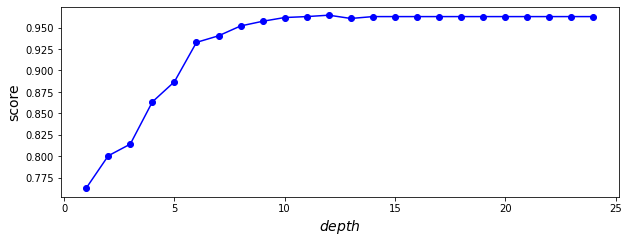

In [154]:
RTRF_per_Depth = [tree.DecisionTreeClassifier(max_depth=k, random_state=42).fit(x_trainRFRT, y_trainRFRT)
                for k in range(1, 25)]
scores = [model.score(x_testRFRT, y_testRFRT) for model in RTRF_per_Depth]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$depth$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

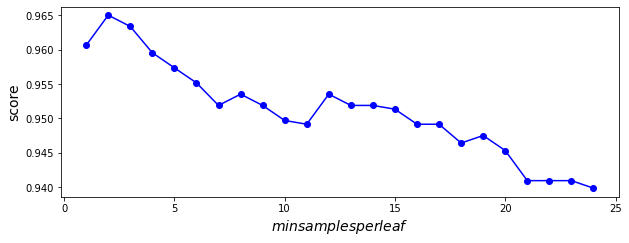

In [155]:
RTRF_per_MinSamples = [tree.DecisionTreeClassifier(max_depth=13, min_samples_leaf=k, random_state=42).fit(x_trainRFRT, y_trainRFRT)
                for k in range(1, 25)]
scores = [model.score(x_testRFRT, y_testRFRT) for model in RTRF_per_MinSamples]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$min samples per leaf$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

In [156]:
x_trainRFRT, x_testRFRT, y_trainRFRT, y_testRFRT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)

RFRT = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
RFRT = RFRT.fit(x_trainRFRT, y_trainRFRT)
print("Score with training set: " + str(RFRT.score(x_trainRFRT, y_trainRFRT)) + "\nScore with test set: " + str(RFRT.score(x_testRFRT, y_testRFRT)))


Score with training set: 0.99703125
Score with test set: 0.9708348523514401


In [157]:
x_trainRFRT, x_testRFRT, y_trainRFRT, y_testRFRT = train_test_split(bayesMoviesRT, targetRT, test_size = 0.6)

RFRT = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
RFRT = RFRT.fit(x_trainRFRT, y_trainRFRT)
print("Score with training set: " + str(RFRT.score(x_trainRFRT, y_trainRFRT)) + "\nScore with test set: " + str(RFRT.score(x_testRFRT, y_testRFRT)))


Score with training set: 0.9950779327317474
Score with test set: 0.953335763762304


## IMDb

In [158]:
x_trainRFIM, x_testRFIM, y_trainRFIM, y_testRFIM = train_test_split(bayesMoviesIM, targetIMDb, test_size = 0.2)

RFIM= RandomForestClassifier(random_state=42)
scores = cross_val_score(RFIM, x_trainRFIM, y_trainRFIM, cv=10)
scores.mean()

0.9211098278426887

In [159]:
RFIM = RFIM.fit(x_trainRFIM, y_trainRFIM)
predictedRFIM= RFIM.predict(x_testRFIM)
acRFIM= accuracy_score(predictedRFIM,y_testRFIM)

confMatrixRFIM = confusion_matrix(y_testRFIM, predictedRFIM)

TNRFIM = confMatrixRFIM[0][0]
FNRFIM = confMatrixRFIM[1][0]
TPRFIM = confMatrixRFIM[1][1]
FPRFIM = confMatrixRFIM[0][1]


successRateRFIM = (TPRFIM+TNRFIM) /(TPRFIM+TNRFIM+FPRFIM+FNRFIM)
errorRateRFIM = 1 - successRateRFIM
sensitivityRFIM = TPRFIM/(TPRFIM+FNRFIM)
specificityRFIM = TNRFIM/(TNRFIM+FPRFIM)
precisionRFIM = TPRFIM/(TPRFIM+FPRFIM)
recallRFIM = TPRFIM/(TPRFIM+FNRFIM)

F_measureRFIM = (2*recallRFIM*precisionRFIM) / (recallRFIM+precisionRFIM)
rocAUCRFIM = roc_auc_score(y_testRFIM, RFIM.predict_proba(x_testRFIM), multi_class='ovr')

print("The analysis of random forest decision tree for IMDb class attribute using the whole dataframe")
print("SuccessRate: " + str(successRateRFIM))
print("errorRate: " + str(errorRateRFIM))
print("Sensitivity: " + str(sensitivityRFIM))
print("Specificity: " + str(specificityRFIM))
print("Precision: "+ str(precisionRFIM))
print("Recall: "+ str(recallRFIM))
print("F_measure: "+ str(F_measureRFIM))
print("Accuracy: " + str(acRFIM))
print("Area under the curve "+ str(rocAUCRFIM))

The analysis of random forest decision tree for IMDb class attribute using the whole dataframe
SuccessRate: 0.9670731707317073
errorRate: 0.03292682926829271
Sensitivity: 0.991899852724595
Specificity: 0.8475177304964538
Precision: 0.9690647482014388
Recall: 0.991899852724595
F_measure: 0.980349344978166
Accuracy: 0.9294696555494806
Area under the curve 0.9868919320869254


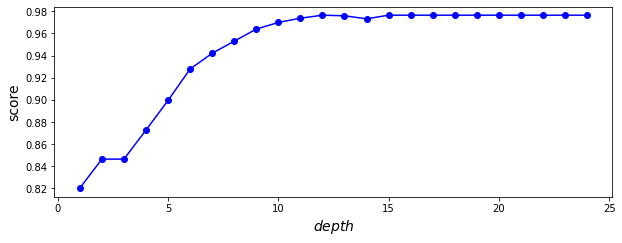

In [160]:
IMRF_per_Depth = [tree.DecisionTreeClassifier(max_depth=k, random_state=42).fit(x_trainRFIM, y_trainRFIM)
                for k in range(1, 25)]
scores = [model.score(x_testRFIM, y_testRFIM) for model in IMRF_per_Depth]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$depth$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

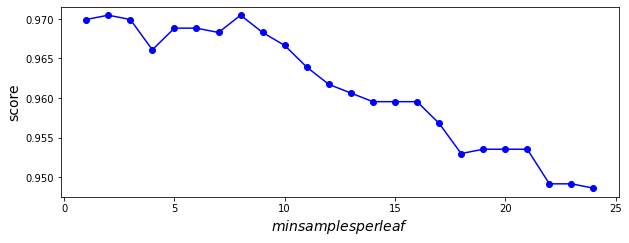

In [161]:
IMRF_per_MinSamples = [tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=k, random_state=42).fit(x_trainRFIM, y_trainRFIM)
                for k in range(1, 25)]
scores = [model.score(x_testRFIM, y_testRFIM) for model in IMRF_per_MinSamples]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 25), scores, "bo-")
plt.xlabel("$min samples per leaf$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

In [162]:
x_trainRFIM, x_testRFIM, y_trainRFIM, y_testRFIM = train_test_split(bayesMoviesIM, targetIMDb, test_size = 0.3)

RFIM = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
RFIM = RFIM.fit(x_trainRFIM, y_trainRFIM)
print("Score with training set: " + str(RFIM.score(x_trainRFIM, y_trainRFIM)) + "\nScore with test set: " + str(RFIM.score(x_testRFIM, y_testRFIM)))


Score with training set: 0.9934375
Score with test set: 0.970470288005833


In [163]:
x_trainRFIM, x_testRFIM, y_trainRFIM, y_testRFIM = train_test_split(bayesMoviesIM, targetIMDb, test_size = 0.6)

RFIM = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=1, random_state=42)
RFIM = RFIM.fit(x_trainRFIM, y_trainRFIM)
print("Score with training set: " + str(RFIM.score(x_trainRFIM, y_trainRFIM)) + "\nScore with test set: " + str(RFIM.score(x_testRFIM, y_testRFIM)))


Score with training set: 0.9958982772764561
Score with test set: 0.9564345606999636


# Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

x_trainRTLR, x_testRTLR, y_trainRTLR, y_testRTLR = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)
LRRT = LogisticRegression(random_state=42, solver="liblinear")
scores = cross_val_score(LRRT, x_trainRTLR, y_trainRTLR, cv=10)
scores.mean()

0.8068750000000001

In [165]:
LRRT = LogisticRegression(random_state=42, solver="liblinear").fit(x_trainRTLR, y_trainRTLR)
LRRT.score(x_trainRTLR, y_trainRTLR)

0.82640625

In [166]:
LRRT.score(x_testRTLR, y_testRTLR)

0.8359460444768502

# Multi Layer Perceptron

In [167]:
from sklearn.neural_network import MLPClassifier

x_trainRTMLP, x_testRTMLP, y_trainRTMLP, y_testRTMLP = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)
MLPRT = MLPClassifier(random_state=42)
scores = cross_val_score(MLPRT, x_trainRTMLP, y_trainRTMLP, cv=10)
scores.mean()



0.7225

In [168]:
MLPRT = MLPClassifier(random_state=42).fit(x_trainRTMLP, y_trainRTMLP)
MLPRT.score(x_trainRTMLP, y_trainRTMLP)

0.744375

In [169]:
MLPRT.score(x_testRTMLP, y_testRTMLP)

0.7455340867663143

/Users/lachlanmackay/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


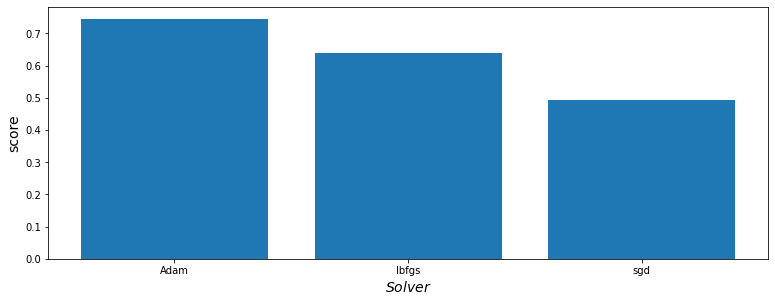

In [170]:

RTMLP_per_solver = [0,0,0]
RTMLP_per_solver[0] = MLPClassifier(random_state=42, solver="adam").fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_solver[1] = MLPClassifier(random_state=42, solver="lbfgs").fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_solver[2] = MLPClassifier(random_state=42, solver="sgd").fit(x_trainRTMLP, y_trainRTMLP)
scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_solver]


ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["Adam", "lbfgs", "sgd"],scores)
plt.xlabel("$Solver$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

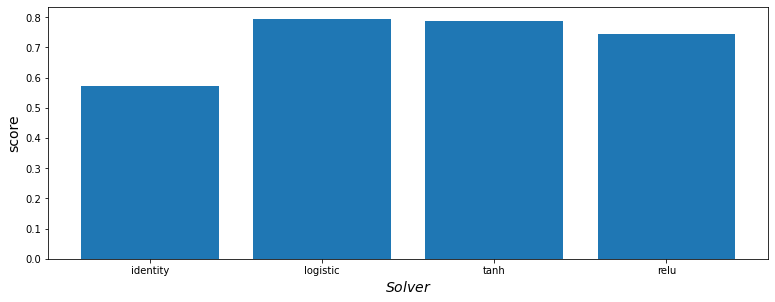

In [171]:


RTMLP_per_activation = [0,0,0,0]
RTMLP_per_activation[0] = MLPClassifier(random_state=42, solver="adam", activation="identity").fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_activation[1] = MLPClassifier(random_state=42, solver="adam", activation="logistic").fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_activation[2] = MLPClassifier(random_state=42, solver="adam", activation="tanh").fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_activation[3] = MLPClassifier(random_state=42, solver="adam", activation="relu").fit(x_trainRTMLP, y_trainRTMLP)
scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_activation]


ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["identity", "logistic", "tanh", "relu"],scores)
plt.xlabel("$Solver$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

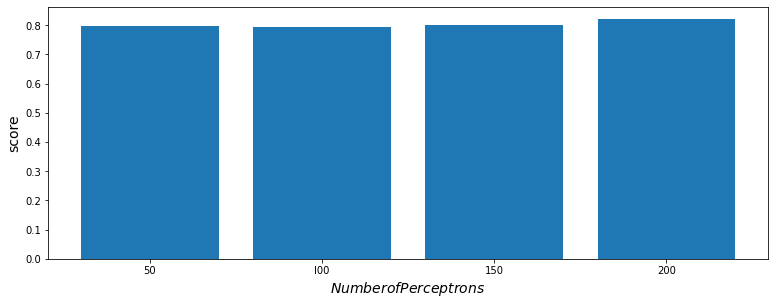

In [172]:


RTMLP_per_sizeAndNumber = [0,0,0,0]
RTMLP_per_sizeAndNumber[0] = MLPClassifier(random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (50,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_sizeAndNumber[1] = MLPClassifier(random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (100,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_sizeAndNumber[2] = MLPClassifier(random_state=42, solver="adam", activation="logistic", hidden_layer_sizes= (150,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_sizeAndNumber[3] = MLPClassifier(random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (200,)).fit(x_trainRTMLP, y_trainRTMLP)
scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_sizeAndNumber]
                                           



ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["50", "l00", "150", "200"],scores)
plt.xlabel("$Number of Perceptrons$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()


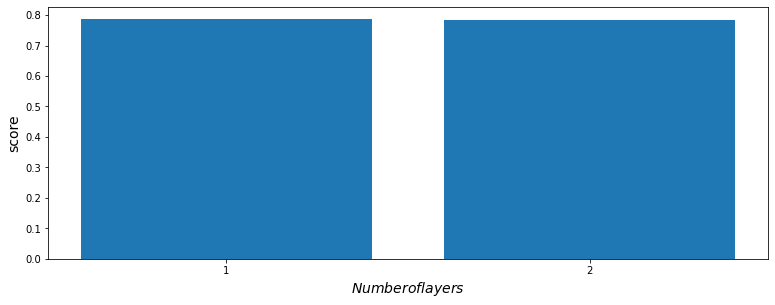

In [229]:

RTMLP_per_sizeAndNumber = [0,0]
RTMLP_per_sizeAndNumber[0] = MLPClassifier(random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (200,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_sizeAndNumber[1] = MLPClassifier(random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (200,200)).fit(x_trainRTMLP, y_trainRTMLP)

scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_sizeAndNumber]
                                           

ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,1,1])
ax.bar(["1", "2"],scores)
plt.xlabel("$Number of layers$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

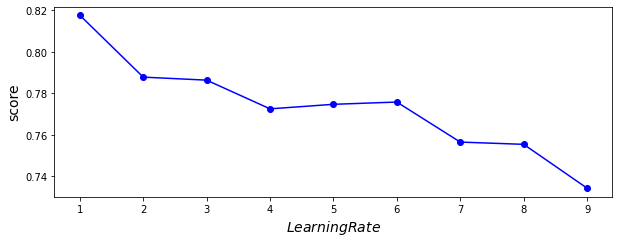

In [231]:
RTMLP_per_learningRate = [MLPClassifier(learning_rate_init=k*0.0008, random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (200,)).fit(x_trainRTMLP, y_trainRTMLP)
                for k in range(1, 10)]
scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_learningRate]

ks = [k*0.0008 for k in range(1, 10)]
plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 10), scores, "bo-")
plt.xlabel("$Learning Rate$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

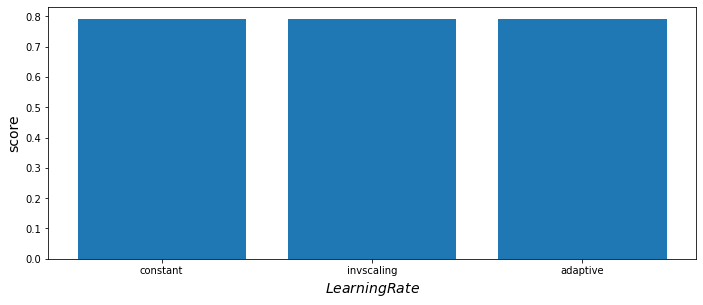

In [175]:

RTMLP_per_learningRate = [0,0,0]
RTMLP_per_learningRate[0] = MLPClassifier(learning_rate_init=0.0008, learning_rate="constant", random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (100,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_learningRate[1] = MLPClassifier(learning_rate_init=0.0008, learning_rate="invscaling", random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (100,)).fit(x_trainRTMLP, y_trainRTMLP)
RTMLP_per_learningRate[2] = MLPClassifier(learning_rate_init=0.0008, learning_rate="adaptive", random_state=42, solver="adam", activation="logistic", hidden_layer_sizes= (100,)).fit(x_trainRTMLP, y_trainRTMLP)

scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_learningRate]
                                           



ax = plt.figure(figsize=(10, 3.5)).add_axes([0,0,0.9,1])
ax.bar(["constant", "invscaling", "adaptive"],scores)
plt.xlabel("$Learning Rate$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

/Users/lachlanmackay/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


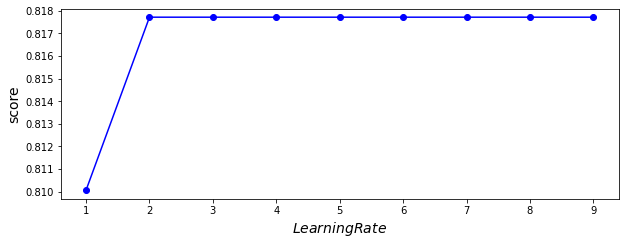

In [233]:
RTMLP_per_max= [MLPClassifier(max_iter=100*k, learning_rate_init=0.0008, learning_rate="constant", random_state=42, solver="adam", activation="logistic",hidden_layer_sizes= (200,)).fit(x_trainRTMLP, y_trainRTMLP)
                for k in range(1, 10)]
scores = [model.score(x_testRTMLP, y_testRTMLP) for model in RTMLP_per_max]

plt.figure(figsize=(10, 3.5))
plt.plot(range(1, 10), scores, "bo-")
plt.xlabel("$Learning Rate$", fontsize=14)
plt.ylabel("score", fontsize=14)
plt.show()

# Convolutional Neural Network

In [196]:
#bayesMoviesRT = bayesMoviesRT.to_numpy()
x_trainRTMLP, x_testRTMLP, y_trainRTMLP, y_testRTMLP = train_test_split(bayesMoviesRT, targetRT, test_size = 0.3)

x_testRTMLP.shape


(2743, 38)

In [192]:
x_trainRTMLP= x_trainRTMLP.reshape(6400, 38, 1)
x_testRTMLP= x_trainRTMLP.reshape(6400, 38, 1)

In [204]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, (3), activation='relu', input_shape=(38, 1)),
    tf.keras.layers.MaxPooling1D(2, 2),
    tf.keras.layers.Conv1D(64, (3), activation='relu'),
    tf.keras.layers.MaxPooling1D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_trainRTMLP, y_trainRTMLP, epochs=100, verbose = 1 )

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 36, 64)            256       
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 18, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 16, 64)            12352     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

200/200 [==============================] - 1s 7ms/step - loss: 0.4686 - accuracy: 0.8159
Epoch 67/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4621 - accuracy: 0.8167
Epoch 68/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4570 - accuracy: 0.8180
Epoch 69/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4511 - accuracy: 0.8250
Epoch 70/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4588 - accuracy: 0.8222
Epoch 71/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4461 - accuracy: 0.8220
Epoch 72/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4607 - accuracy: 0.8138
Epoch 73/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8344
Epoch 74/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4185 - accuracy: 0.8320
Epoch 75/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3888 - accuracy: 

In [227]:
l , accuracy = model.evaluate(x_testRTMLP, y_testRTMLP, batch_size=32, verbose=0)
print(accuracy)

0.8844330906867981


In [226]:
l , accuracy = model.evaluate(x_trainRTMLP, y_trainRTMLP, batch_size=32, verbose=0)
print(accuracy)

0.8878124952316284


In [212]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)

inputs = np.concatenate((x_trainRTMLP, x_testRTMLP), axis=0)
targets = np.concatenate((y_trainRTMLP, y_testRTMLP), axis=0)


fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(64, (3), activation='relu', input_shape=(38, 1)),
        tf.keras.layers.MaxPooling1D(2, 2),
        tf.keras.layers.Conv1D(64, (3), activation='relu'),
        tf.keras.layers.MaxPooling1D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()


    history = model.fit(inputs[train], targets[train],
              epochs=100,
              verbose=1)




Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 36, 64)            256       
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 18, 64)           0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 16, 64)            12352     
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 8, 64)            0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 128)             

258/258 [==============================] - 1s 6ms/step - loss: 0.3378 - accuracy: 0.8532
Epoch 67/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3604 - accuracy: 0.8544
Epoch 68/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3398 - accuracy: 0.8505
Epoch 69/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3391 - accuracy: 0.8522
Epoch 70/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3405 - accuracy: 0.8528
Epoch 71/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8557
Epoch 72/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8565
Epoch 73/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8587
Epoch 74/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3335 - accuracy: 0.8554
Epoch 75/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3682 - accuracy: 

258/258 [==============================] - 1s 4ms/step - loss: 0.8984 - accuracy: 0.7400
Epoch 32/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5680 - accuracy: 0.7738
Epoch 33/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5164 - accuracy: 0.7917
Epoch 34/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4940 - accuracy: 0.7986
Epoch 35/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4537 - accuracy: 0.8227
Epoch 36/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4395 - accuracy: 0.8227
Epoch 37/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4469 - accuracy: 0.8188
Epoch 38/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4279 - accuracy: 0.8274
Epoch 39/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4078 - accuracy: 0.8328
Epoch 40/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4005 - accuracy: 

Epoch 1/100
258/258 [==============================] - 2s 4ms/step - loss: 7.9212 - accuracy: 0.5345
Epoch 2/100
258/258 [==============================] - 1s 5ms/step - loss: 2.8266 - accuracy: 0.5771
Epoch 3/100
258/258 [==============================] - 1s 4ms/step - loss: 1.3683 - accuracy: 0.6327
Epoch 4/100
258/258 [==============================] - 1s 5ms/step - loss: 1.0417 - accuracy: 0.6438
Epoch 5/100
258/258 [==============================] - 1s 4ms/step - loss: 1.1348 - accuracy: 0.6362
Epoch 6/100
258/258 [==============================] - 1s 6ms/step - loss: 0.8503 - accuracy: 0.6737
Epoch 7/100
258/258 [==============================] - 2s 7ms/step - loss: 0.7768 - accuracy: 0.6931
Epoch 8/100
258/258 [==============================] - 3s 10ms/step - loss: 0.7837 - accuracy: 0.6915 0s - loss:
Epoch 9/100
258/258 [==============================] - 1s 6ms/step - loss: 0.7215 - accuracy: 0.7032
Epoch 10/100
258/258 [==============================] - 2s 8ms/step - loss: 0.7

258/258 [==============================] - 1s 6ms/step - loss: 0.2746 - accuracy: 0.8845
Epoch 82/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2890 - accuracy: 0.8796
Epoch 83/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2813 - accuracy: 0.8797
Epoch 84/100
258/258 [==============================] - 2s 7ms/step - loss: 0.2693 - accuracy: 0.8860
Epoch 85/100
258/258 [==============================] - 1s 5ms/step - loss: 0.2755 - accuracy: 0.8832
Epoch 86/100
258/258 [==============================] - 1s 4ms/step - loss: 0.2800 - accuracy: 0.8810
Epoch 87/100
258/258 [==============================] - 1s 4ms/step - loss: 0.2747 - accuracy: 0.8845
Epoch 88/100
258/258 [==============================] - 1s 5ms/step - loss: 0.2879 - accuracy: 0.8805
Epoch 89/100
258/258 [==============================] - 1s 5ms/step - loss: 0.2677 - accuracy: 0.8877
Epoch 90/100
258/258 [==============================] - 1s 6ms/step - loss: 0.2713 - accuracy: 

Epoch 47/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3583 - accuracy: 0.8603
Epoch 48/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8669
Epoch 49/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8656
Epoch 50/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8652
Epoch 51/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8567
Epoch 52/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3155 - accuracy: 0.8700
Epoch 53/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8632
Epoch 54/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8658
Epoch 55/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3170 - accuracy: 0.8662
Epoch 56/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3253

258/258 [==============================] - 1s 3ms/step - loss: 0.6843 - accuracy: 0.7228
Epoch 13/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6810 - accuracy: 0.7240
Epoch 14/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6772 - accuracy: 0.7316
Epoch 15/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6938 - accuracy: 0.7198
Epoch 16/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6670 - accuracy: 0.7272
Epoch 17/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6521 - accuracy: 0.7403
Epoch 18/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6478 - accuracy: 0.7423
Epoch 19/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6329 - accuracy: 0.7443
Epoch 20/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6415 - accuracy: 0.7384
Epoch 21/100
258/258 [==============================] - 1s 4ms/step - loss: 0.6139 - accuracy: 

258/258 [==============================] - 2s 7ms/step - loss: 0.2832 - accuracy: 0.8758
Epoch 93/100
258/258 [==============================] - 1s 6ms/step - loss: 0.2821 - accuracy: 0.8809
Epoch 94/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2938 - accuracy: 0.8750
Epoch 95/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2985 - accuracy: 0.8709
Epoch 96/100
258/258 [==============================] - 2s 8ms/step - loss: 0.2889 - accuracy: 0.8788
Epoch 97/100
258/258 [==============================] - 2s 7ms/step - loss: 0.2816 - accuracy: 0.8756
Epoch 98/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2915 - accuracy: 0.8748
Epoch 99/100
258/258 [==============================] - 1s 6ms/step - loss: 0.2895 - accuracy: 0.8756
Epoch 100/100
258/258 [==============================] - 2s 6ms/step - loss: 0.2799 - accuracy: 0.8803
Model: "sequential_16"
_________________________________________________________________
 Laye

258/258 [==============================] - 2s 8ms/step - loss: 0.3204 - accuracy: 0.8646
Epoch 58/100
258/258 [==============================] - 2s 6ms/step - loss: 0.3119 - accuracy: 0.8702
Epoch 59/100
258/258 [==============================] - 2s 9ms/step - loss: 0.3030 - accuracy: 0.8741
Epoch 60/100
258/258 [==============================] - 2s 7ms/step - loss: 0.3140 - accuracy: 0.8702
Epoch 61/100
258/258 [==============================] - 2s 7ms/step - loss: 0.2920 - accuracy: 0.8764
Epoch 62/100
258/258 [==============================] - 1s 5ms/step - loss: 0.2904 - accuracy: 0.8768
Epoch 63/100
258/258 [==============================] - 2s 6ms/step - loss: 0.3108 - accuracy: 0.8669
Epoch 64/100
258/258 [==============================] - 2s 8ms/step - loss: 0.2869 - accuracy: 0.8798
Epoch 65/100
258/258 [==============================] - 2s 7ms/step - loss: 0.2963 - accuracy: 0.8748
Epoch 66/100
258/258 [==============================] - 1s 5ms/step - loss: 0.2928 - accuracy: 

258/258 [==============================] - 1s 5ms/step - loss: 0.5106 - accuracy: 0.7988
Epoch 23/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4879 - accuracy: 0.8096
Epoch 24/100
258/258 [==============================] - 1s 5ms/step - loss: 0.5896 - accuracy: 0.7967
Epoch 25/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4880 - accuracy: 0.8120
Epoch 26/100
258/258 [==============================] - 2s 6ms/step - loss: 0.4648 - accuracy: 0.8172
Epoch 27/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4483 - accuracy: 0.8214
Epoch 28/100
258/258 [==============================] - 2s 6ms/step - loss: 0.4434 - accuracy: 0.8221
Epoch 29/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4363 - accuracy: 0.8261
Epoch 30/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4190 - accuracy: 0.8345
Epoch 31/100
258/258 [==============================] - 1s 5ms/step - loss: 0.4108 - accuracy: 

Epoch 1/100
258/258 [==============================] - 2s 5ms/step - loss: 6.3874 - accuracy: 0.5321
Epoch 2/100
258/258 [==============================] - 1s 6ms/step - loss: 2.0458 - accuracy: 0.5782
Epoch 3/100
258/258 [==============================] - 1s 5ms/step - loss: 1.3985 - accuracy: 0.6176
Epoch 4/100
258/258 [==============================] - 1s 5ms/step - loss: 1.0263 - accuracy: 0.6459
Epoch 5/100
258/258 [==============================] - 1s 4ms/step - loss: 0.9399 - accuracy: 0.6520
Epoch 6/100
258/258 [==============================] - 1s 4ms/step - loss: 0.9018 - accuracy: 0.6524
Epoch 7/100
258/258 [==============================] - 1s 4ms/step - loss: 0.8704 - accuracy: 0.6689
Epoch 8/100
258/258 [==============================] - 1s 5ms/step - loss: 0.7867 - accuracy: 0.6907
Epoch 9/100
258/258 [==============================] - 1s 5ms/step - loss: 0.7463 - accuracy: 0.7022
Epoch 10/100
258/258 [==============================] - 1s 5ms/step - loss: 0.7430 - accura

258/258 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8553
Epoch 82/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3306 - accuracy: 0.8579
Epoch 83/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3239 - accuracy: 0.8616
Epoch 84/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3281 - accuracy: 0.8548
Epoch 85/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8613
Epoch 86/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3206 - accuracy: 0.8654
Epoch 87/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3349 - accuracy: 0.8578
Epoch 88/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3193 - accuracy: 0.8620
Epoch 89/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3217 - accuracy: 0.8585
Epoch 90/100
258/258 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 

258/258 [==============================] - 1s 4ms/step - loss: 0.3864 - accuracy: 0.8398
Epoch 48/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.8449
Epoch 49/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3792 - accuracy: 0.8488
Epoch 50/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3579 - accuracy: 0.8425
Epoch 51/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3653 - accuracy: 0.8475
Epoch 52/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3581 - accuracy: 0.8441
Epoch 53/100
258/258 [==============================] - 1s 5ms/step - loss: 0.3585 - accuracy: 0.8455
Epoch 54/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3544 - accuracy: 0.8511
Epoch 55/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.8481
Epoch 56/100
258/258 [==============================] - 1s 4ms/step - loss: 0.3461 - accuracy: 

258/258 [==============================] - 1s 5ms/step - loss: 0.6225 - accuracy: 0.7632
Epoch 14/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5893 - accuracy: 0.7765
Epoch 15/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5701 - accuracy: 0.7836
Epoch 16/100
258/258 [==============================] - 1s 5ms/step - loss: 0.5548 - accuracy: 0.7864
Epoch 17/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5265 - accuracy: 0.7982
Epoch 18/100
258/258 [==============================] - 1s 4ms/step - loss: 0.5288 - accuracy: 0.8000
Epoch 19/100
258/258 [==============================] - 1s 5ms/step - loss: 0.5182 - accuracy: 0.8002
Epoch 20/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4991 - accuracy: 0.8104
Epoch 21/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4984 - accuracy: 0.8063
Epoch 22/100
258/258 [==============================] - 1s 4ms/step - loss: 0.4868 - accuracy: 

258/258 [==============================] - 2s 10ms/step - loss: 0.2966 - accuracy: 0.8835
Epoch 94/100
258/258 [==============================] - 2s 10ms/step - loss: 0.2785 - accuracy: 0.8812
Epoch 95/100
258/258 [==============================] - 3s 11ms/step - loss: 0.2966 - accuracy: 0.8759
Epoch 96/100
258/258 [==============================] - 3s 10ms/step - loss: 0.2794 - accuracy: 0.8777
Epoch 97/100
258/258 [==============================] - 3s 11ms/step - loss: 0.2663 - accuracy: 0.8905
Epoch 98/100
258/258 [==============================] - 2s 9ms/step - loss: 0.2717 - accuracy: 0.8843
Epoch 99/100
258/258 [==============================] - 2s 9ms/step - loss: 0.3088 - accuracy: 0.8741
Epoch 100/100
258/258 [==============================] - 2s 9ms/step - loss: 0.2719 - accuracy: 0.8877


In [222]:
np.mean(history.history['accuracy'])

0.8301701301336288